___


# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">**Employee Churn Analysis**</h1>
# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">*K-Means, Random Forest, KNN and Gradient Boosting - Classification* </h1>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". We will be able to build your own classification models for a variety of business settings in this project.

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , kmeans algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.


## Determines
In this project we have HR data of a company. A study is requested from we to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, we have two types of employee one who stayed and another who left the company.

We can describe 10 attributes in detail as:
- ***Satisfaction_Level:*** It is employee satisfaction point, which ranges from 0-1.
- ***Last_Evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, we must use exploratory data analysis and data visualization techniques. 

Then, we must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. we are asked to perform ***Cluster Analysis*** based on the information we obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. We are asked to use the ***K-means*** algorithm to make cluster analysis. However, we must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data we apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, we are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, we must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train our models with our train set, test the success of our model with our test set. 

Try to make our predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. We can use the related modules of the ***scikit-learn*** library. We can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. We can use the ***Yellowbrick*** module for model selection and visualization.

In the final step,we will deploy our model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [140]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import scipy.stats as stats
%matplotlib inline
import datetime as dt
from datetime import datetime

# Scaling
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

# models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, PowerTransformer, LabelEncoder 
from sklearn.svm import SVR, SVC
from sklearn.tree import plot_tree, DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport

from xgboost import XGBRegressor, XGBClassifier, plot_importance

# Libraries for Style
from colorama import Fore, Style
from termcolor import colored, cprint

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

sns.set_style("whitegrid") 
# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [141]:
df = pd.read_csv("HR_Dataset.csv")
df

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Departments   salary  
0                          0        sales     low  
1                          0        sales  medium  
2                          0        sales  medium  
3                          0        sales     low  
4                          0        sales     low  
...                      ...          ...     ...  
14994                      0      support     low  
14995                      0      support     low  
14996                      0      support     low  
14997                      0      support     low  
14998                      0      support     low  

[14999 rows x 10 columns]

### Data Insights

In the given dataset, we have two types of employee one who stayed and another who left the company. So, we can divide data into two groups and compare their characteristics. Here, we can find the average of both the groups using groupby() and mean() function.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [143]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count           14999.000        14999.000       14999.000   
mean                0.613            0.716           3.803   
std                 0.249            0.171           1.233   
min                 0.090            0.360           2.000   
25%                 0.440            0.560           3.000   
50%                 0.640            0.720           4.000   
75%                 0.820            0.870           5.000   
max                 1.000            1.000           7.000   

       average_montly_hours  time_spend_company  Work_accident      left  \
count             14999.000           14999.000      14999.000 14999.000   
mean                201.050               3.498          0.145     0.238   
std                  49.943               1.460          0.352     0.426   
min                  96.000               2.000          0.000     0.000   
25%                 156.000               3.000          0.000     0.000   
50%                 200.000               3.000          0.000     0.000   
75%                 245.000               4.000          0.000     0.000   
max                 310.000              10.000          1.000     1.000   

       promotion_last_5years  
count              14999.000  
mean                   0.021  
std                    0.144  
min                    0.000  
25%                    0.000  
50%                    0.000  
75%                    0.000  
max                    1.000

In [144]:
df.columns=[i.title() for i in df.columns]

In [145]:
df["Departments"] = df["Departments "]

In [146]:
df = df.drop("Departments ",axis=1)

In [147]:
df.Left.value_counts()

0    11428
1     3571
Name: Left, dtype: int64

In [148]:
fig = px.pie(df, values = df['Left'].value_counts(), 
             names = (df['Left'].value_counts()).index,
             title = "Left Column Distribution", width=800, color_discrete_sequence=px.colors.sequential.RdBu,
                   height=500)
fig.update_traces(textposition='inside', textinfo="label+percent")
fig.show()

In [149]:
df.Work_Accident.value_counts()

0    12830
1     2169
Name: Work_Accident, dtype: int64

In [150]:
df.Time_Spend_Company.value_counts(ascending=False)

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: Time_Spend_Company, dtype: int64

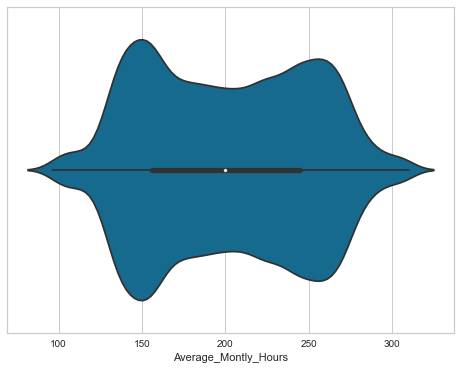

In [151]:
# df.Average_Montly_Hours.value_counts(ascending=False)
plt.rcParams["figure.figsize"] = (8,6)
sns.violinplot(df.Average_Montly_Hours);

In [152]:
df.Departments.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments, dtype: int64

In [153]:
df.Number_Project.value_counts(ascending=False)

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: Number_Project, dtype: int64

In [154]:
df.Promotion_Last_5Years.value_counts()

0    14680
1      319
Name: Promotion_Last_5Years, dtype: int64

In [155]:
df = df.iloc[:, [0,1,2,3,4,5,7,8,9,6]]
df

Satisfaction_Level  Last_Evaluation  Number_Project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       Average_Montly_Hours  Time_Spend_Company  Work_Accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       Promotion_Last_5Years  Salary Departments  Left  
0                          0     low       sales     1  
1                          0  medium       sales     1  
2                          0  medium       sales     1  
3                          0     low       sales     1  
4                          0     low       sales     1  
...                      ...     ...         ...   ...  
14994                      0     low     support     1  
14995                      0     low     support     1  
14996                      0     low     support     1  
14997                      0     low     support     1  
14998                      0     low     support     1  

[14999 rows x 10 columns]

In [156]:
df.groupby("Salary")["Left"].value_counts(normalize=True)

Salary  Left
high    0      0.934
        1      0.066
low     0      0.703
        1      0.297
medium  0      0.796
        1      0.204
Name: Left, dtype: float64

In [157]:
df.groupby("Salary")["Left"].value_counts()

Salary  Left
high    0       1155
        1         82
low     0       5144
        1       2172
medium  0       5129
        1       1317
Name: Left, dtype: int64

In [158]:
df.groupby("Time_Spend_Company")["Left"].value_counts(normalize=True)

Time_Spend_Company  Left
2                   0      0.984
                    1      0.016
3                   0      0.754
                    1      0.246
4                   0      0.652
                    1      0.348
5                   1      0.566
                    0      0.434
6                   0      0.709
                    1      0.291
7                   0      1.000
8                   0      1.000
10                  0      1.000
Name: Left, dtype: float64

In [159]:
df.groupby("Departments")["Time_Spend_Company"].value_counts()

Departments  Time_Spend_Company
IT           3                      523
             2                      268
             4                      215
             5                      131
             6                       52
             10                      16
             7                       12
             8                       10
RandD        3                      341
             2                      181
             4                      132
             5                       81
             6                       42
             8                       10
accounting   3                      335
             4                      160
             2                      142
             5                       75
             6                       31
             8                       14
             10                      10
hr           3                      333
             2                      162
             4                      122
        

In [160]:
df.groupby("Promotion_Last_5Years")["Left"].value_counts()

Promotion_Last_5Years  Left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
Name: Left, dtype: int64

In [161]:
df.groupby("Promotion_Last_5Years")["Left"].value_counts(normalize=True)

Promotion_Last_5Years  Left
0                      0      0.758
                       1      0.242
1                      0      0.940
                       1      0.060
Name: Left, dtype: float64

In [162]:
df.groupby("Left").agg(["mean","min","max"]).T.style.background_gradient(cmap='BuPu_r')

In [163]:
df.groupby("Left").mean()

Satisfaction_Level  Last_Evaluation  Number_Project  \
Left                                                        
0                  0.667            0.715           3.787   
1                  0.440            0.718           3.856   

      Average_Montly_Hours  Time_Spend_Company  Work_Accident  \
Left                                                            
0                  199.060               3.380          0.175   
1                  207.419               3.877          0.047   

      Promotion_Last_5Years  
Left                         
0                     0.026  
1                     0.005

In [164]:
df[df.Left ==1].describe().T.style.background_gradient(cmap='BuPu_r')

In [165]:
df_salary = pd.crosstab([df.Departments, df.Left], df.Salary)
# df_salary = pd.DataFrame(df.groupby(["Departments","Left", "Salary"]).agg({'Salary':"count"}))
df_salary 

Salary            high   low  medium
Departments Left                    
IT          0       79   437     438
            1        4   172      97
RandD       0       47   309     310
            1        4    55      62
accounting  0       69   259     235
            1        5    99     100
hr          0       39   243     242
            1        6    92     117
management  0      224   121     194
            1        1    59      31
marketing   0       71   276     308
            1        9   126      68
product_mng 0       62   346     296
            1        6   105      87
sales       0      255  1402    1469
            1       14   697     303
support     0      133   757     784
            1        8   389     158
technical   0      176   994     853
            1       25   378     294

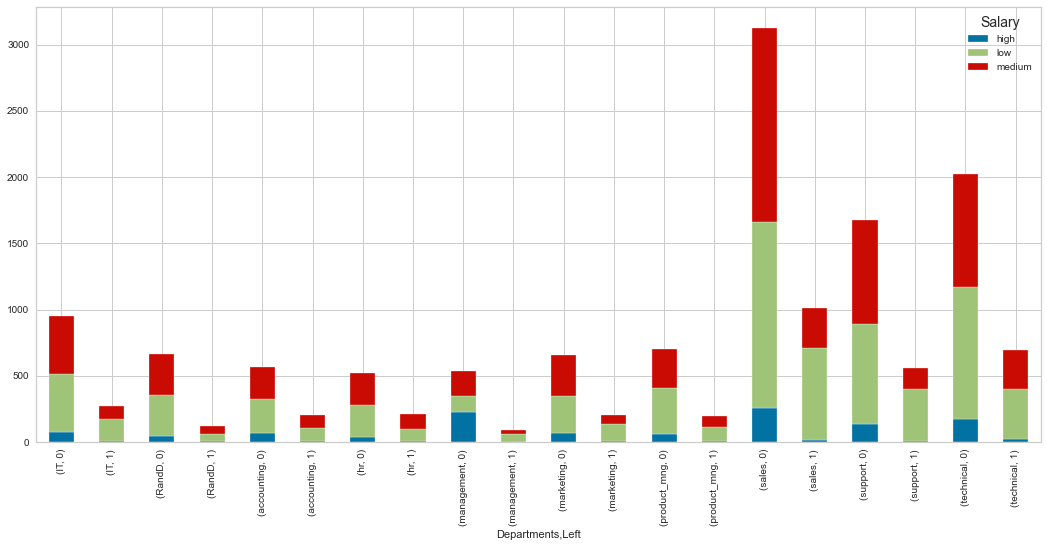

In [540]:
df_salary.plot(kind='bar', stacked=True, figsize=(18,8));

In [167]:
# OUTLIERS

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in df.iloc[:, [0,1,3]].columns:
    
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_lim = df[col].quantile(0.25) - factor*IQR
        upper_lim = df[col].quantile(0.75) + factor*IQR
    
        cond = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 2:
            list1.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        if cond > 0 and factor == 3:
            list2.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 1.5 IQR :
-------------------------------------

TOTAL OUTLIERS FOR 1.5 IQR : 0

Outliers for 2 IQR :
-------------------------------------

TOTAL OUTLIERS FOR 2 IQR : 0



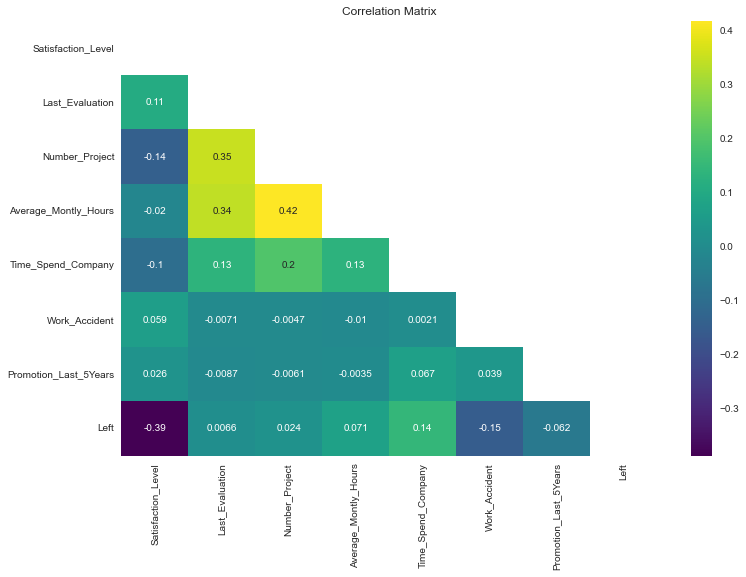

In [168]:
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis', mask=matrix)
plt.title("Correlation Matrix");

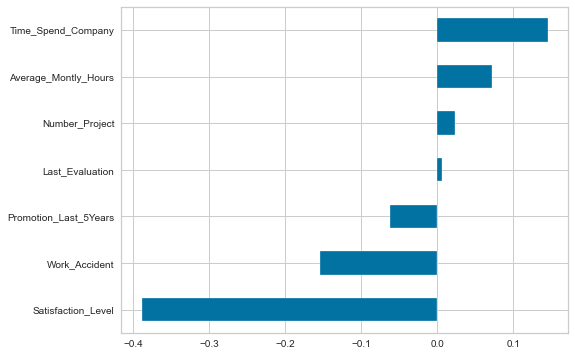

In [169]:
df.corr()['Left'].sort_values().drop('Left').plot(kind = 'barh');

## 2. Data Visualization

We can search for answers to the following questions using data visualization methods. Based on these responses, we can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

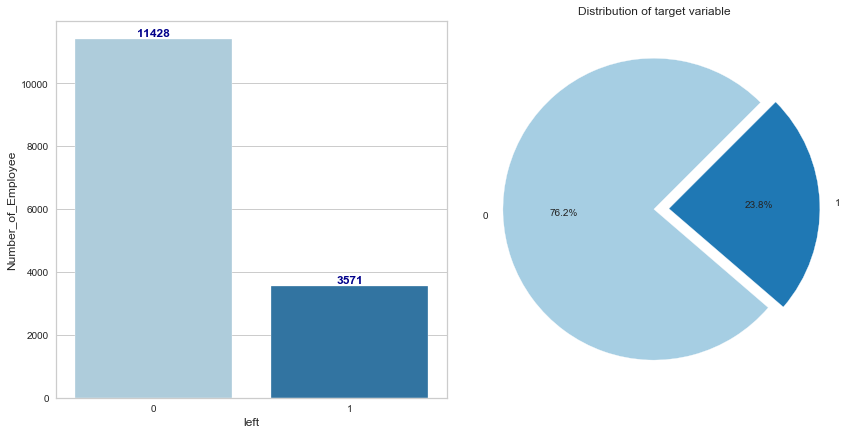

In [170]:
plt.figure(figsize=(12,6))
colors=sns.color_palette('Paired')
plt.subplot(1,2,1)
ax = sns.countplot(x="Left", data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12, color='darkblue', fontweight='bold')
plt.xlabel("left", size=12)
plt.ylabel("Number_of_Employee", size=12)

plt.subplot(1,2,2)
plt.pie(df.Left.value_counts(), colors=colors, labels = df.Left.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1))
plt.title('Distribution of target variable')
plt.tight_layout()
plt.show();


### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

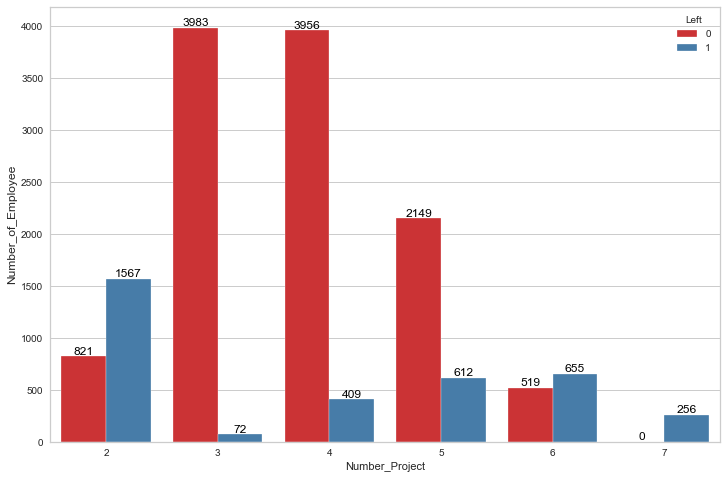

In [171]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Number_Project", hue="Left", data=df, palette="Set1")
ax.bar_label(ax.containers[0], fontsize=12, color='black' )
ax.bar_label(ax.containers[1], fontsize=12, color='black' )
plt.ylabel("Number_of_Employee", size=12);



### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


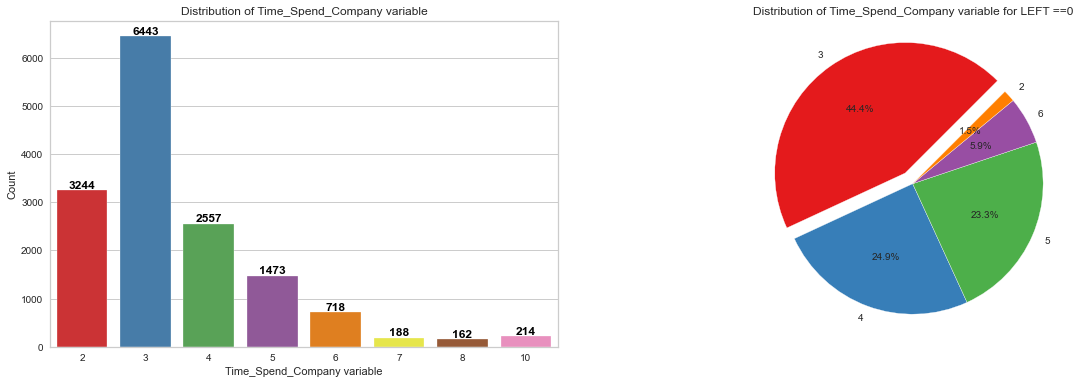

In [172]:
# with seaborn
plt.figure(figsize=(20,6))
colors=sns.color_palette('Set1')
plt.subplot(1,2,1)
ax = sns.countplot(x='Time_Spend_Company', data=df,palette = 'Set1')
plt.title('Distribution of Time_Spend_Company variable')
plt.xlabel('Time_Spend_Company variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')

plt.subplot(1,2,2)
plt.pie(df[df.Left == 1].Time_Spend_Company.value_counts(), labels = df[df.Left == 1].Time_Spend_Company.value_counts().index, autopct = '%1.1f%%', colors=colors, startangle = 45, explode=[0.1,0,0,0,0])
plt.title('Distribution of Time_Spend_Company variable for LEFT ==0');

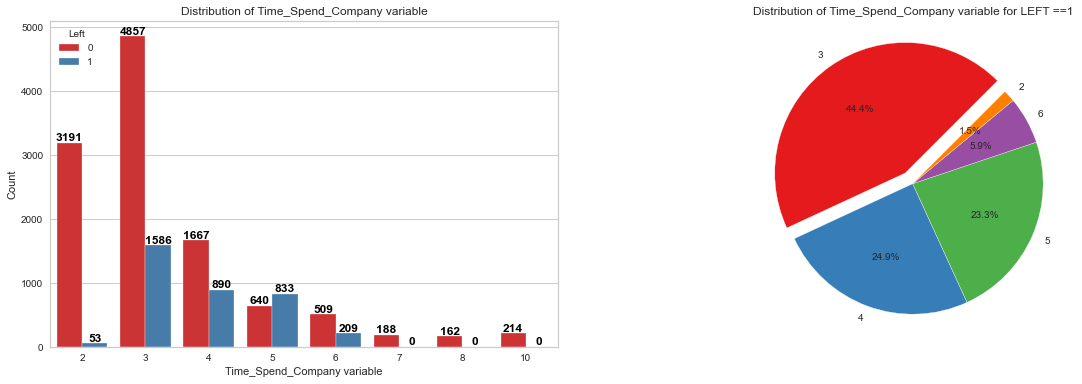

In [173]:
# with seaborn
plt.figure(figsize=(20,6))
colors=sns.color_palette('Set1')
plt.subplot(1,2,1)
ax = sns.countplot(x='Time_Spend_Company', data=df, hue="Left",palette = 'Set1')
plt.title('Distribution of Time_Spend_Company variable')
plt.xlabel('Time_Spend_Company variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(1,2,2)
plt.pie(df[df.Left == 1].Time_Spend_Company.value_counts(), labels = df[df.Left == 1].Time_Spend_Company.value_counts().index, autopct = '%1.1f%%', colors=colors, startangle = 45, explode=[0.1,0,0,0,0])
plt.title('Distribution of Time_Spend_Company variable for LEFT ==1');

### Satisfaction Level

Total number for people who is in satisfaction class HIGH : 4268
Total number for people who is in satisfaction class LOW : 1646
Total number for people who is in satisfaction class NORMAL : 3605
Total number for people who is in satisfaction class VERY HIGH : 4002
Total number for people who is in satisfaction class VERY LOW : 1478


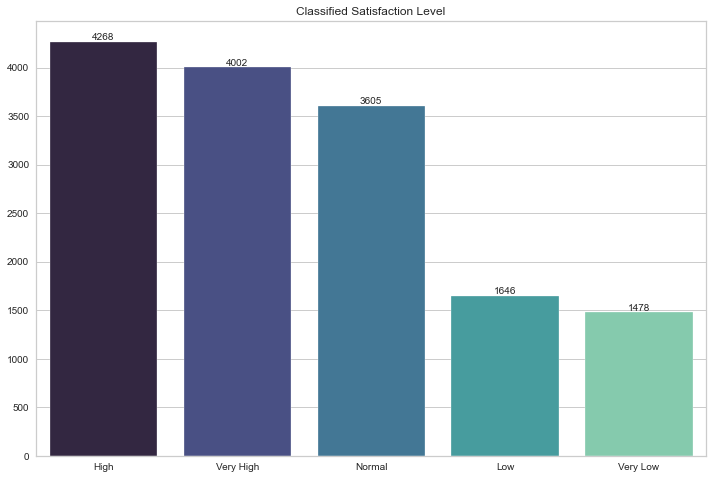

In [174]:
def satisfact(x):
    
    """This function classifies satisfaction level!!!"""
    
    if x <= 0.20:
        return "Very Low"
    elif x <= 0.40:
        return "Low"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "High"
    else:
        return "Very High"
    
df["Satisfaction_Class"] = df["Satisfaction_Level"].apply(satisfact)

for i in df.groupby("Satisfaction_Class")["Left"].count().index:
    print("Total number for people who is in satisfaction class", i.upper(),":", df.groupby("Satisfaction_Class")["Left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Satisfaction Level")
ax = sns.barplot(x=df["Satisfaction_Class"].value_counts().index, y=df["Satisfaction_Class"].value_counts().values, palette="mako")
ax.bar_label(ax.containers[0])
plt.show()

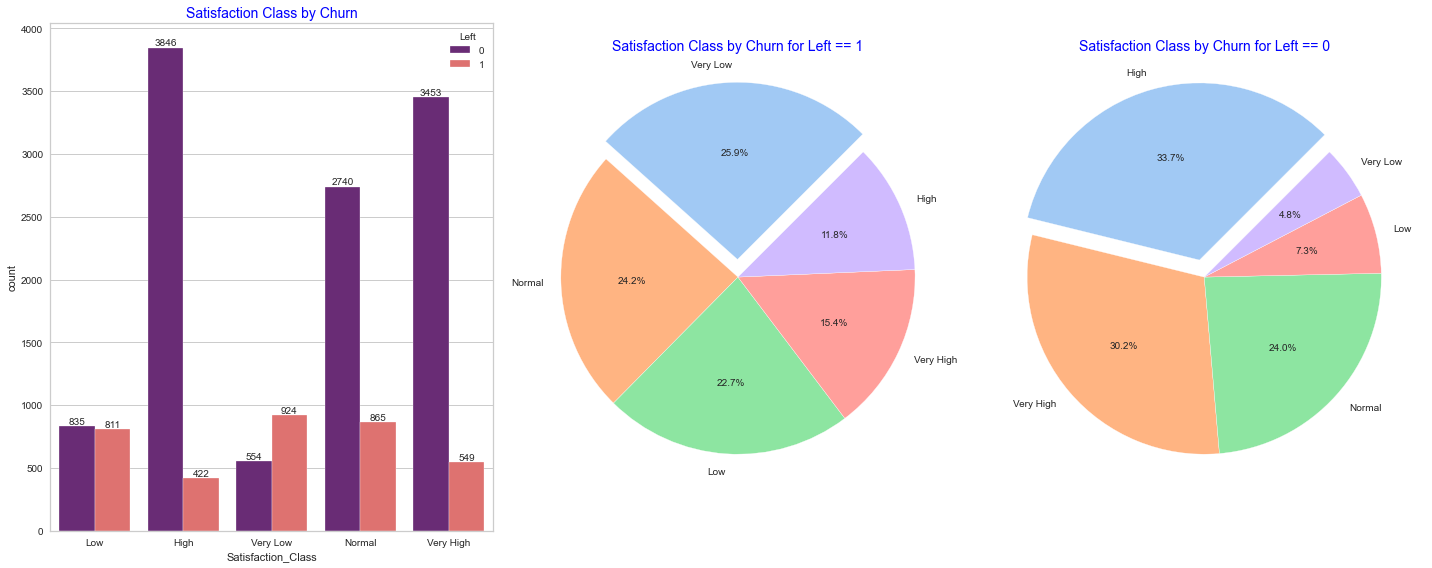

In [175]:
plt.figure(figsize=(20, 8))
colors=sns.color_palette('pastel')
plt.subplot(1,3,1)
plt.title("Satisfaction Class by Churn", c="blue", size=14)
ax = sns.countplot(x="Satisfaction_Class", hue="Left", data=df, palette = 'magma')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Satisfaction Class by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.Left == 1].Satisfaction_Class.value_counts(), labels = df[df.Left == 1].Satisfaction_Class.value_counts().index,colors=colors, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0])
plt.subplot(1,3,3)
plt.title("Satisfaction Class by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.Left == 0].Satisfaction_Class.value_counts(), labels = df[df.Left == 0].Satisfaction_Class.value_counts().index, colors=colors,autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0])
plt.tight_layout()
plt.show()

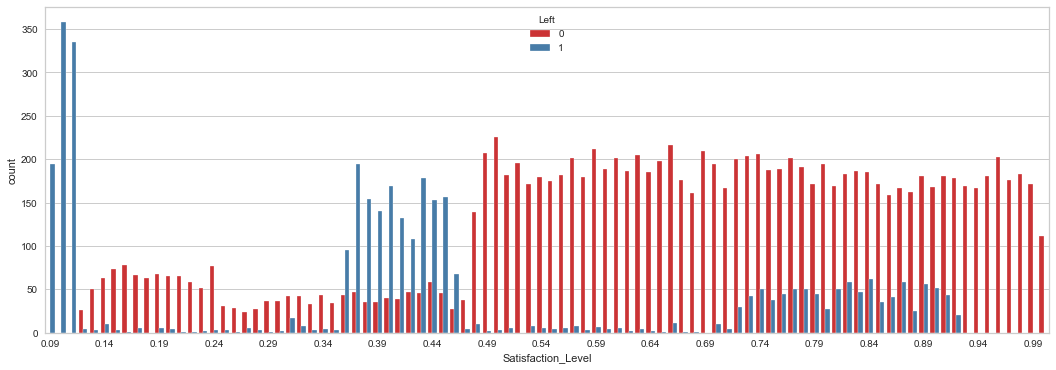

In [176]:
plt.figure(figsize=(18,6))
fig = sns.countplot(data=df, x="Satisfaction_Level", hue="Left", palette="Set1")
new_ticks = [i.get_text() for i in fig.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 5), new_ticks[::5])
plt.show();

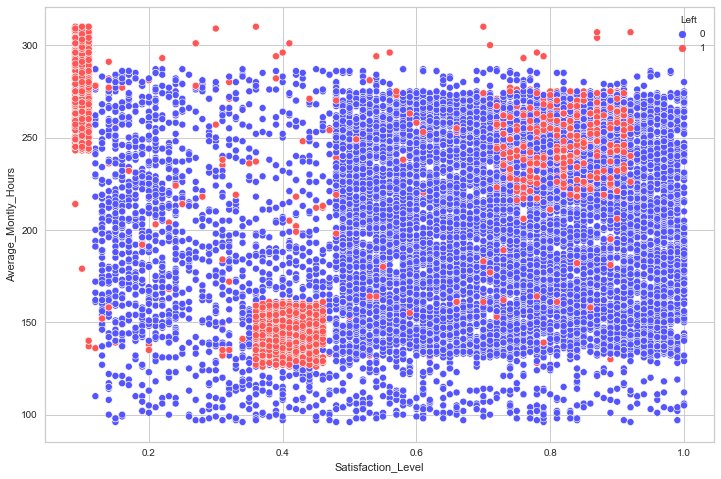

In [177]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Satisfaction_Level', y='Average_Montly_Hours', hue='Left', data=df, palette='seismic');

### Departments

In [178]:
fig = px.bar(data_frame = pd.crosstab(df['Departments'], df['Left']), title = 'Departments and Left', barmode='group')
fig.update_layout(width=1200,
                  height=500,
                  title_x=0.5,
                  title_font_size=24,)

fig.show();

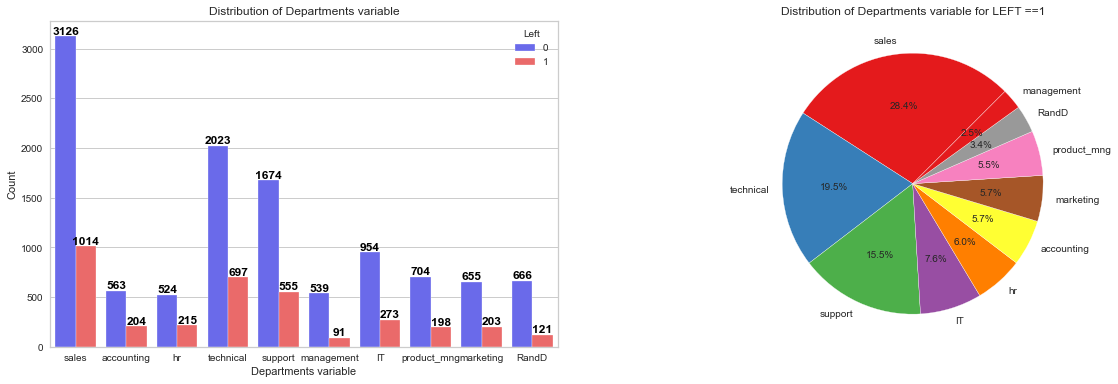

In [179]:
# with seaborn
plt.figure(figsize=(20,6))
colors=sns.color_palette("Set1")
plt.subplot(1,2,1)
ax = sns.countplot(x='Departments', data=df, hue="Left",palette = 'seismic')
plt.title('Distribution of Departments variable')
plt.xlabel('Departments variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(1,2,2)
plt.pie(df[df.Left == 1].Departments.value_counts(), labels = df[df.Left == 1].Departments.value_counts().index, colors=colors, autopct = '%1.1f%%', startangle = 45)
plt.title('Distribution of Departments variable for LEFT ==1');


### Last Evaluation

Total number for people who is in last evaluation class HIGH : 4547
Total number for people who is in last evaluation class LOW : 236
Total number for people who is in last evaluation class NORMAL : 4727
Total number for people who is in last evaluation class VERY HIGH : 5489


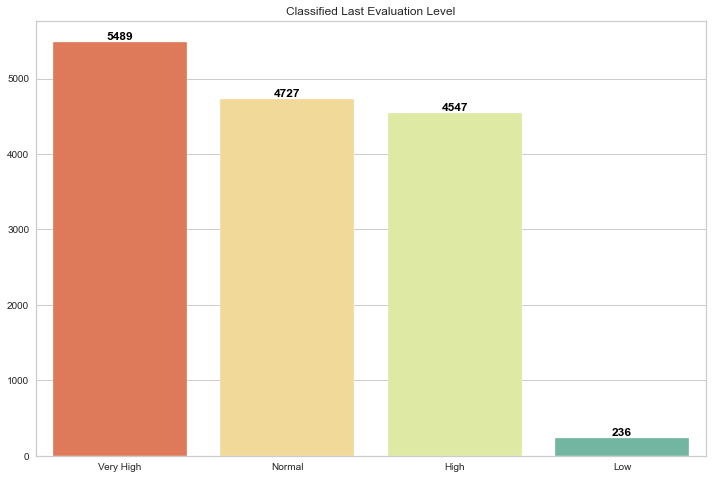

In [180]:
def evaluation(x):
    
    """This function classifies evaluation level!!!"""
    
    if x <= 0.20:
        return "Very Low"
    elif x <= 0.40:
        return "Low"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "High"
    else:
        return "Very High"
    
df["Last_Evaluation_Class"] = df["Last_Evaluation"].apply(evaluation)

for i in df.groupby("Last_Evaluation_Class")["Left"].count().index:
    print("Total number for people who is in last evaluation class", i.upper(),":", df.groupby("Last_Evaluation_Class")["Left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Last Evaluation Level")
ax = sns.barplot(x=df["Last_Evaluation_Class"].value_counts().index, y=df["Last_Evaluation_Class"].value_counts().values, palette="Spectral")
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold' )
plt.show()

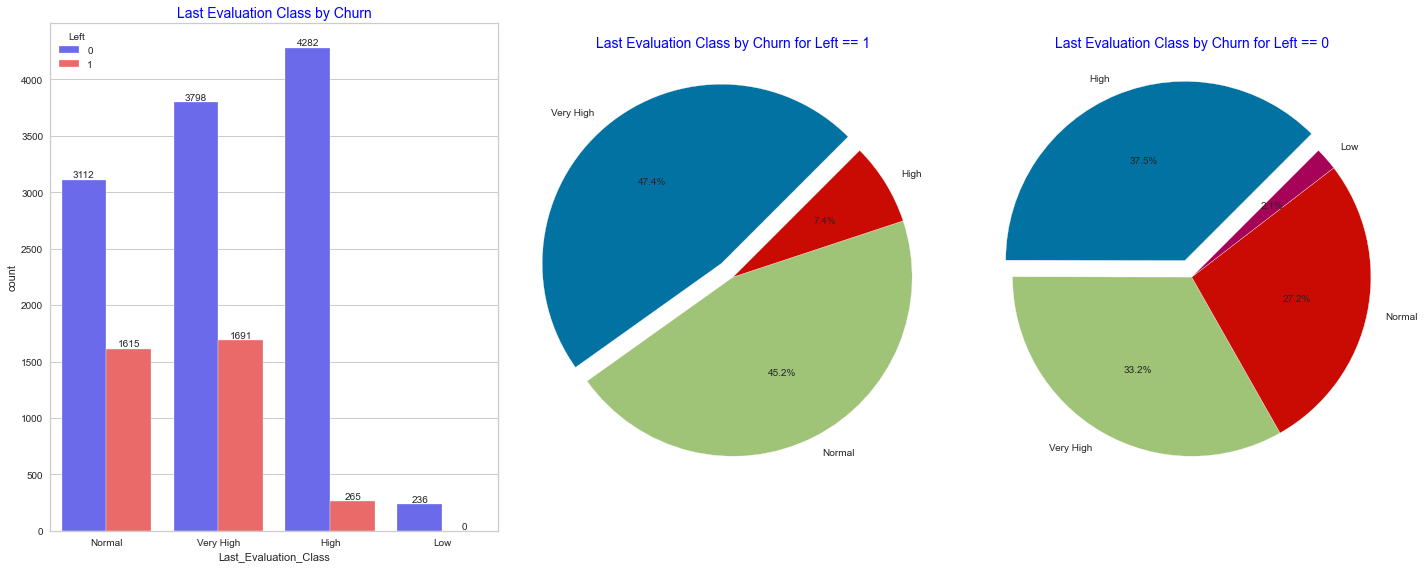

In [181]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.title("Last Evaluation Class by Churn", c="blue", size=14)
ax = sns.countplot(x="Last_Evaluation_Class", hue="Left", data=df, palette = 'seismic')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(1,3,2)
plt.title("Last Evaluation Class by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.Left == 1].Last_Evaluation_Class.value_counts(), labels = df[df.Left == 1].Last_Evaluation_Class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0])
plt.subplot(1,3,3)

plt.title("Last Evaluation Class by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.Left == 0].Last_Evaluation_Class.value_counts(), labels = df[df.Left == 0].Last_Evaluation_Class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0])
plt.tight_layout()
plt.show()

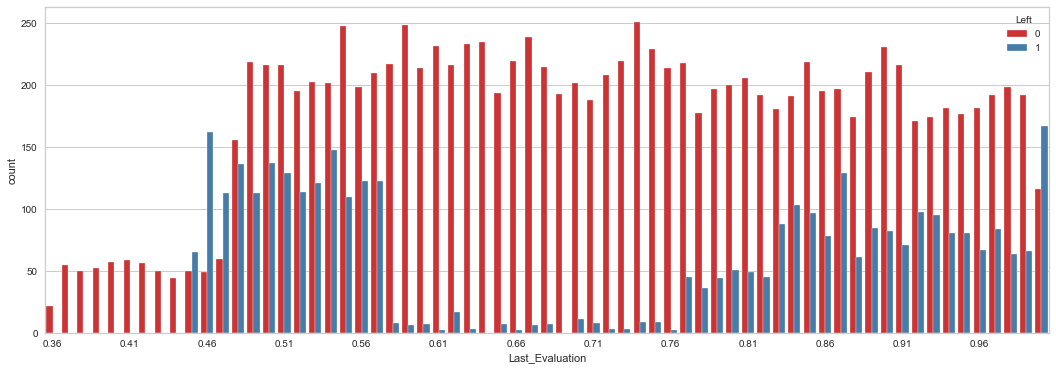

In [182]:
plt.figure(figsize=(18,6))
fig = sns.countplot(data=df, x="Last_Evaluation", hue="Left", palette="Set1")
new_ticks2 = [i.get_text() for i in fig.get_xticklabels()]
plt.xticks(range(0, len(new_ticks2), 5), new_ticks2[::5])
plt.show();

### Average Montly Hours

Total number for people who is in average monthly hours class 0-100 : 54
Total number for people who is in average monthly hours class 100-200 : 7412
Total number for people who is in average monthly hours class 200-300 : 7374
Total number for people who is in average monthly hours class >= 300 : 159


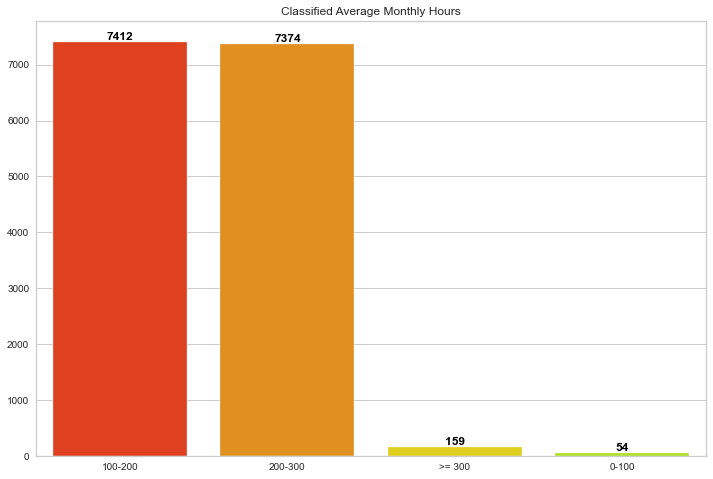

In [183]:
def monthly_hour(x):
    
    """This function classifies average monthly hours!!!"""
    
    if x < 100:
        return "0-100"
    elif x < 200:
        return "100-200"
    elif x <= 300:
        return "200-300"
    elif x >= 300:
        return ">= 300"
    
df["Average_Montly_Hours_Class"] = df["Average_Montly_Hours"].apply(monthly_hour)

for i in df.groupby("Average_Montly_Hours_Class")["Left"].count().index:
    print("Total number for people who is in average monthly hours class", i.upper(),":", df.groupby("Average_Montly_Hours_Class")["Left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Average Monthly Hours")
ax = sns.barplot(x=df["Average_Montly_Hours_Class"].value_counts().index, y=df["Average_Montly_Hours_Class"].value_counts().values, palette="prism")
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

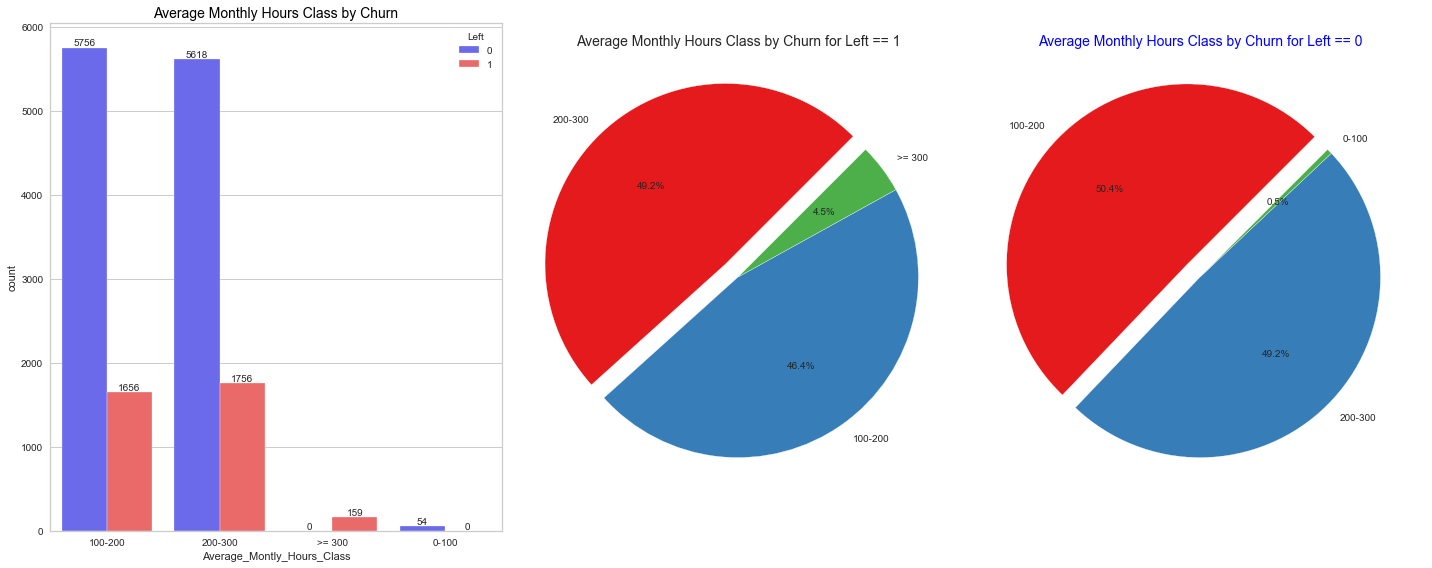

In [184]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.title("Average Monthly Hours Class by Churn", c="black", size=14)
ax = sns.countplot(x="Average_Montly_Hours_Class", hue="Left", data=df, palette = 'seismic')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Average Monthly Hours Class by Churn for Left == 1", size=14)
plt.pie(df[df.Left == 1].Average_Montly_Hours_Class.value_counts(), labels = df[df.Left == 1].Average_Montly_Hours_Class.value_counts().index, autopct = '%1.1f%%', colors= colors, startangle = 45, explode=[0.1,0,0])
plt.subplot(1,3,3)
plt.title("Average Monthly Hours Class by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.Left == 0].Average_Montly_Hours_Class.value_counts(), labels = df[df.Left == 0].Average_Montly_Hours_Class.value_counts().index, autopct = '%1.1f%%',colors= colors,  startangle = 45, explode=[0.1,0,0])
plt.tight_layout()
plt.show()

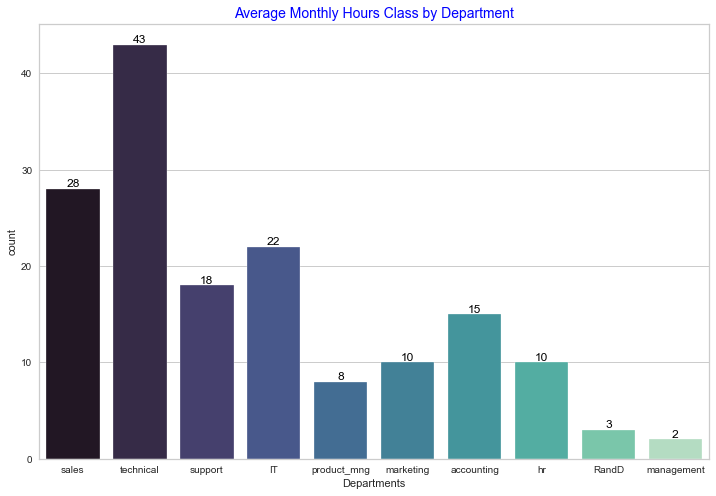

In [185]:
plt.figure(figsize=(12, 8))
plt.title("Average Monthly Hours Class by Department", c="blue", size=14)
ax = sns.countplot(x="Departments", data=df[df["Average_Montly_Hours_Class"] == ">= 300"], palette = 'mako')
ax.bar_label(ax.containers[0],fontsize=12, color='black')
plt.show()

### Salary

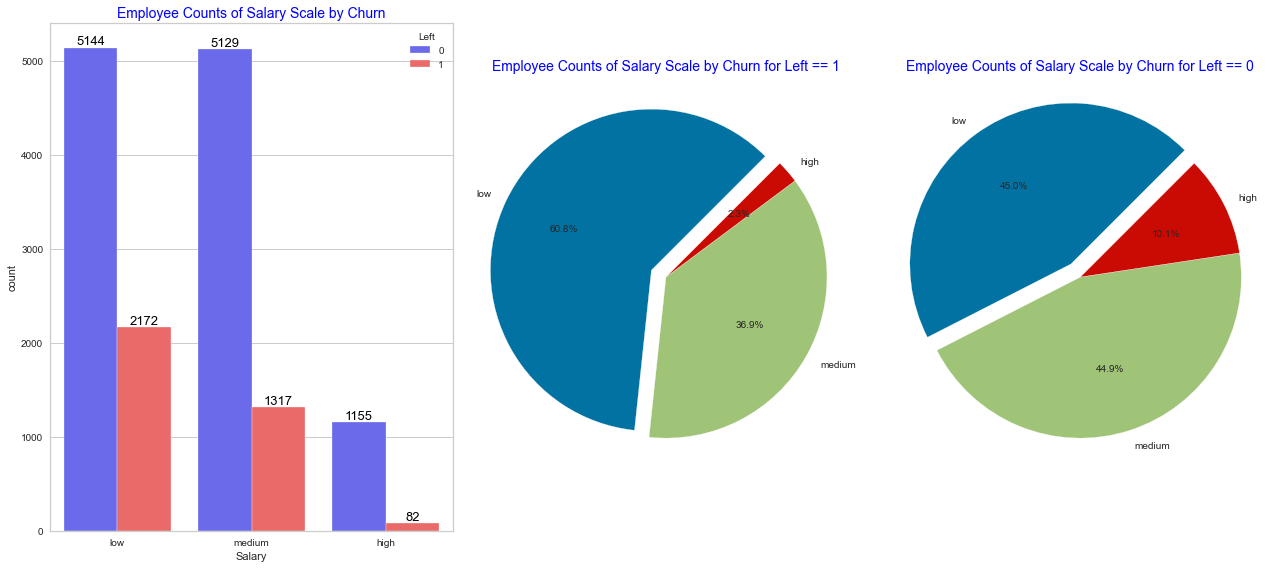

In [186]:
plt.figure(figsize=(18,8))
plt.title("Left counts")
plt.ylabel("Salary")
plt.subplot(1,3,1)
plt.title("Employee Counts of Salary Scale by Churn", c="blue", size=14)
ax = sns.countplot(x="Salary", hue="Left", data=df, palette = 'seismic')
ax.bar_label(ax.containers[0],fontsize=13, color='black' )
ax.bar_label(ax.containers[1], fontsize=13, color='black' )
plt.subplot(1,3,2)
plt.title("Employee Counts of Salary Scale by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.Left == 1].Salary.value_counts(), labels = df[df.Left == 1].Salary.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0])
plt.subplot(1,3,3)
plt.title("Employee Counts of Salary Scale by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.Left == 0].Salary.value_counts(), labels = df[df.Left == 0].Salary.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0])
plt.tight_layout()
plt.show()

### Work Accident

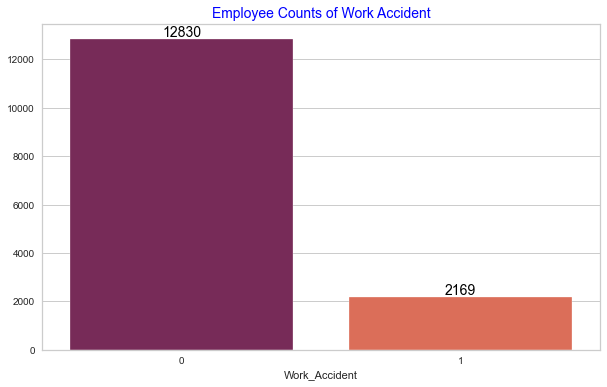

In [187]:
plt.figure(figsize=(10, 6))
plt.title("Employee Counts of Work Accident", c="blue", size=14)
ax = sns.barplot(x = df.groupby("Work_Accident")["Left"].count().index, y = df.groupby("Work_Accident")["Left"].count().values, palette="rocket")
ax.bar_label(ax.containers[0], fontsize=14, color='black')
plt.show();

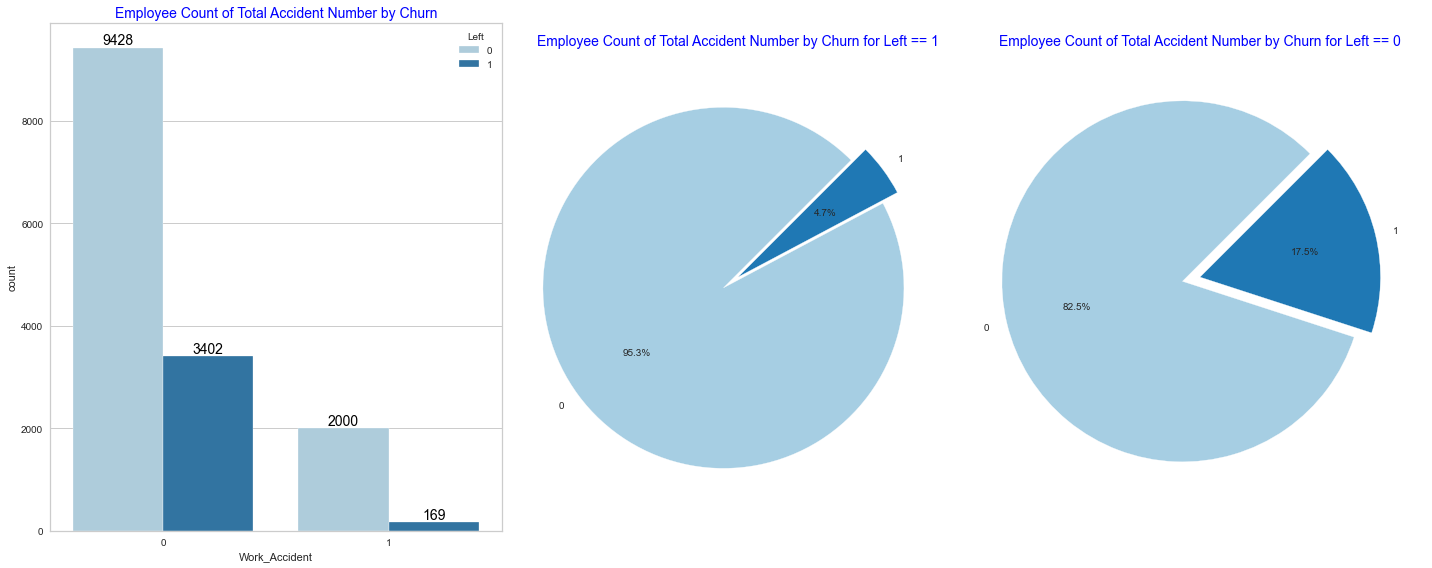

In [188]:
plt.figure(figsize=(20, 8))
colors=sns.color_palette("Paired")
plt.subplot(1,3,1)
plt.title("Employee Count of Total Accident Number by Churn", c="blue", size=14)
ax = sns.countplot(x="Work_Accident", hue="Left", data=df, palette = 'Paired')
ax.bar_label(ax.containers[0], fontsize=14, color='black')
ax.bar_label(ax.containers[1], fontsize=14, color='black')
plt.subplot(1,3,2)
plt.title("Employee Count of Total Accident Number by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.Left == 1].Work_Accident.value_counts(), labels = df[df.Left == 1].Work_Accident.value_counts().index, autopct = '%1.1f%%',colors= colors,startangle = 45, explode=[0.1,0])
plt.subplot(1,3,3)
plt.title("Employee Count of Total Accident Number by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.Left == 0].Work_Accident.value_counts(), labels = df[df.Left == 0].Work_Accident.value_counts().index, autopct = '%1.1f%%',colors= colors, startangle = 45, explode=[0.1,0])
plt.tight_layout()
plt.show()

**Promotion Last 5 Years**

No number of employee promoted within last 5 years: 14680
Yes number of employee promoted within last 5 years: 319


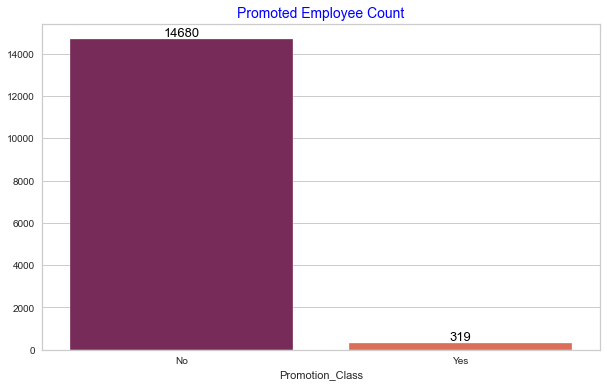

In [189]:
def promotion(x):
    if x == 1:
        return "Yes"
    else:
        return "No"
    
df["Promotion_Class"] = df["Promotion_Last_5Years"].apply(promotion)

for i in df.groupby("Promotion_Class")["Left"].count().index:
    print(i, "number of employee promoted within last 5 years:", df.groupby("Promotion_Class")["Left"].count().loc[i])

plt.figure(figsize=(10, 6))
plt.title("Promoted Employee Count", c="blue", size=14)
ax = sns.barplot(x = df.groupby("Promotion_Class")["Left"].count().index, y = df.groupby("Promotion_Class")["Left"].count().values, palette="rocket")
ax.bar_label(ax.containers[0], fontsize=13, color='black')
plt.show()

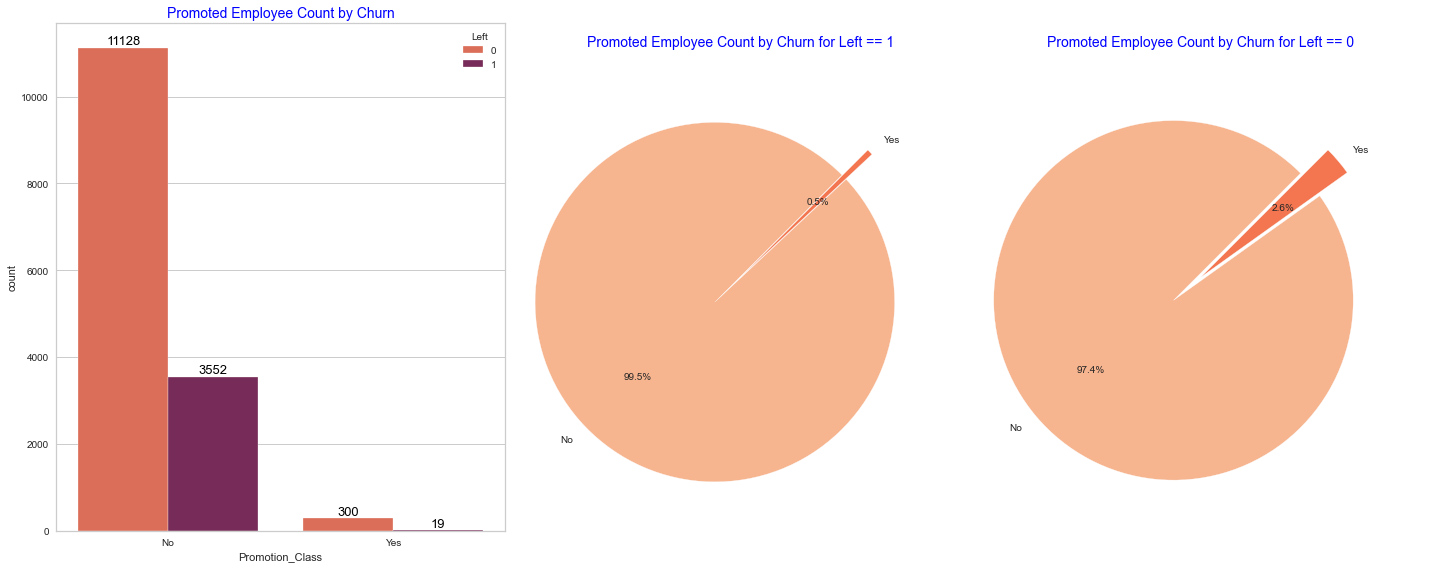

In [190]:
plt.figure(figsize = (20, 8))
colors=sns.color_palette("rocket_r")
plt.subplot(1,3,1)
plt.title("Promoted Employee Count by Churn", c="blue", size=14)
ax = sns.countplot(x="Promotion_Class", hue="Left", data=df, palette="rocket_r")
ax.bar_label(ax.containers[0],fontsize=13, color='black')
ax.bar_label(ax.containers[1],fontsize=13, color='black')
plt.subplot(1,3,2)
plt.title("Promoted Employee Count by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.Left == 1].Promotion_Class.value_counts(), labels = df[df.Left == 1].Promotion_Class.value_counts().index, autopct = '%1.1f%%', colors=colors, startangle = 45, explode=[0.2,0])
plt.subplot(1,3,3)
plt.title("Promoted Employee Count by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.Left == 0].Promotion_Class.value_counts(), labels = df[df.Left == 0].Promotion_Class.value_counts().index, autopct = '%1.1f%%',colors=colors, startangle = 45, explode=[0.2,0])
plt.tight_layout()
plt.show()

### Subplots of Features

You can use the methods of the matplotlib.

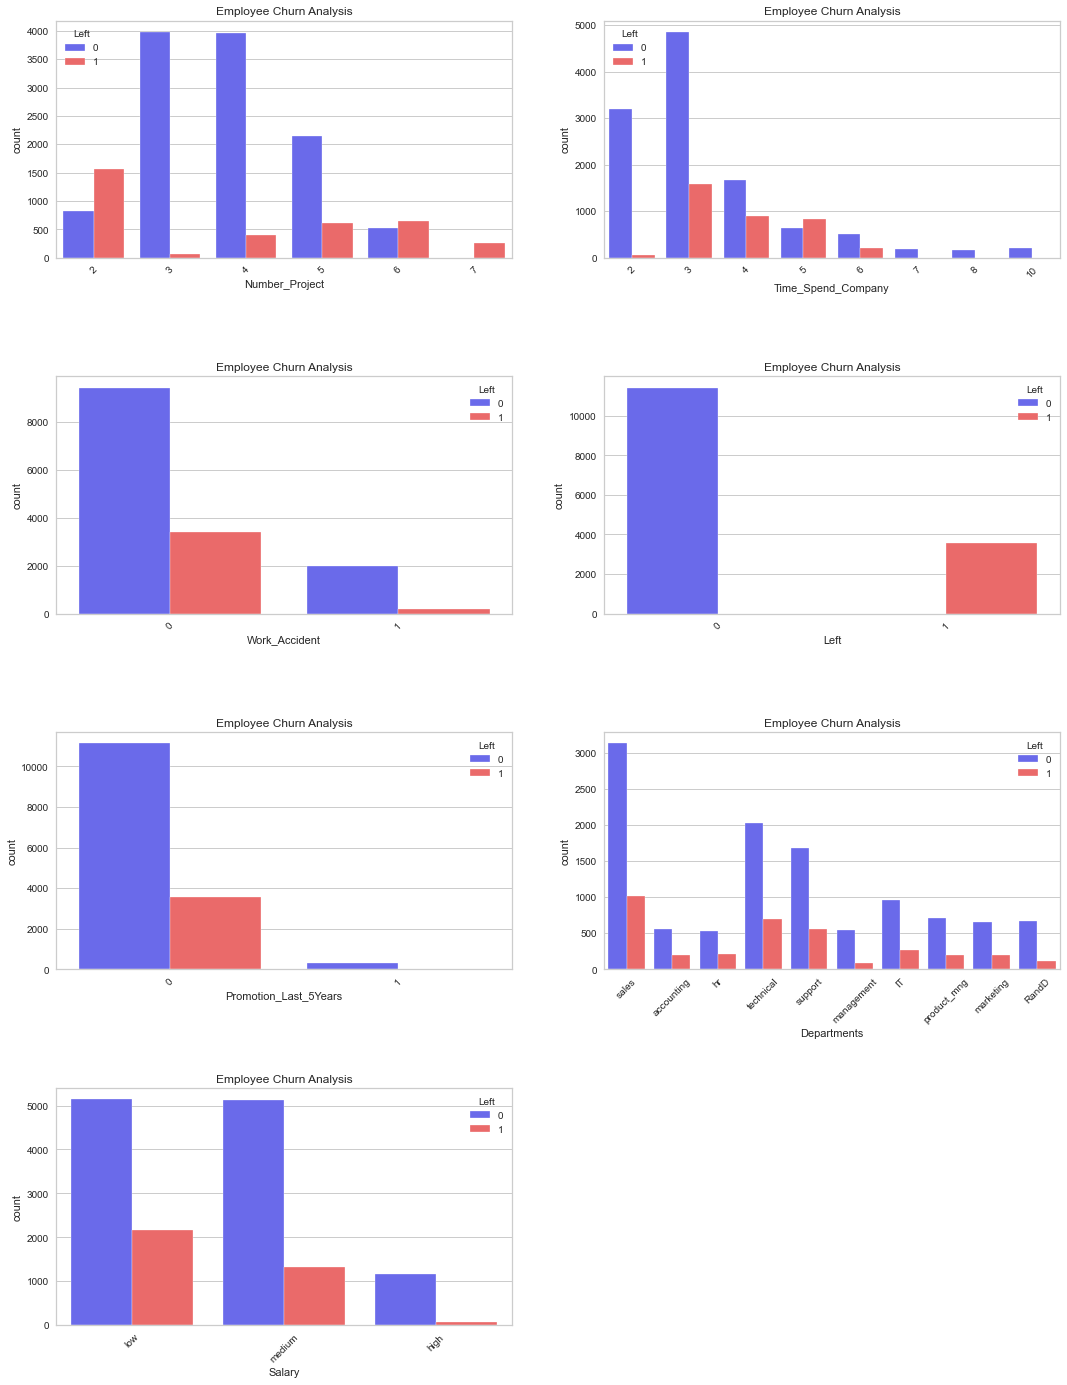

In [191]:
features=['Number_Project','Time_Spend_Company','Work_Accident','Left', 'Promotion_Last_5Years','Departments','Salary']
fig=plt.subplots(figsize=(18,24))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = df, hue='Left',palette = 'seismic')
    plt.xticks(rotation=45)
    plt.title("Employee Churn Analysis")

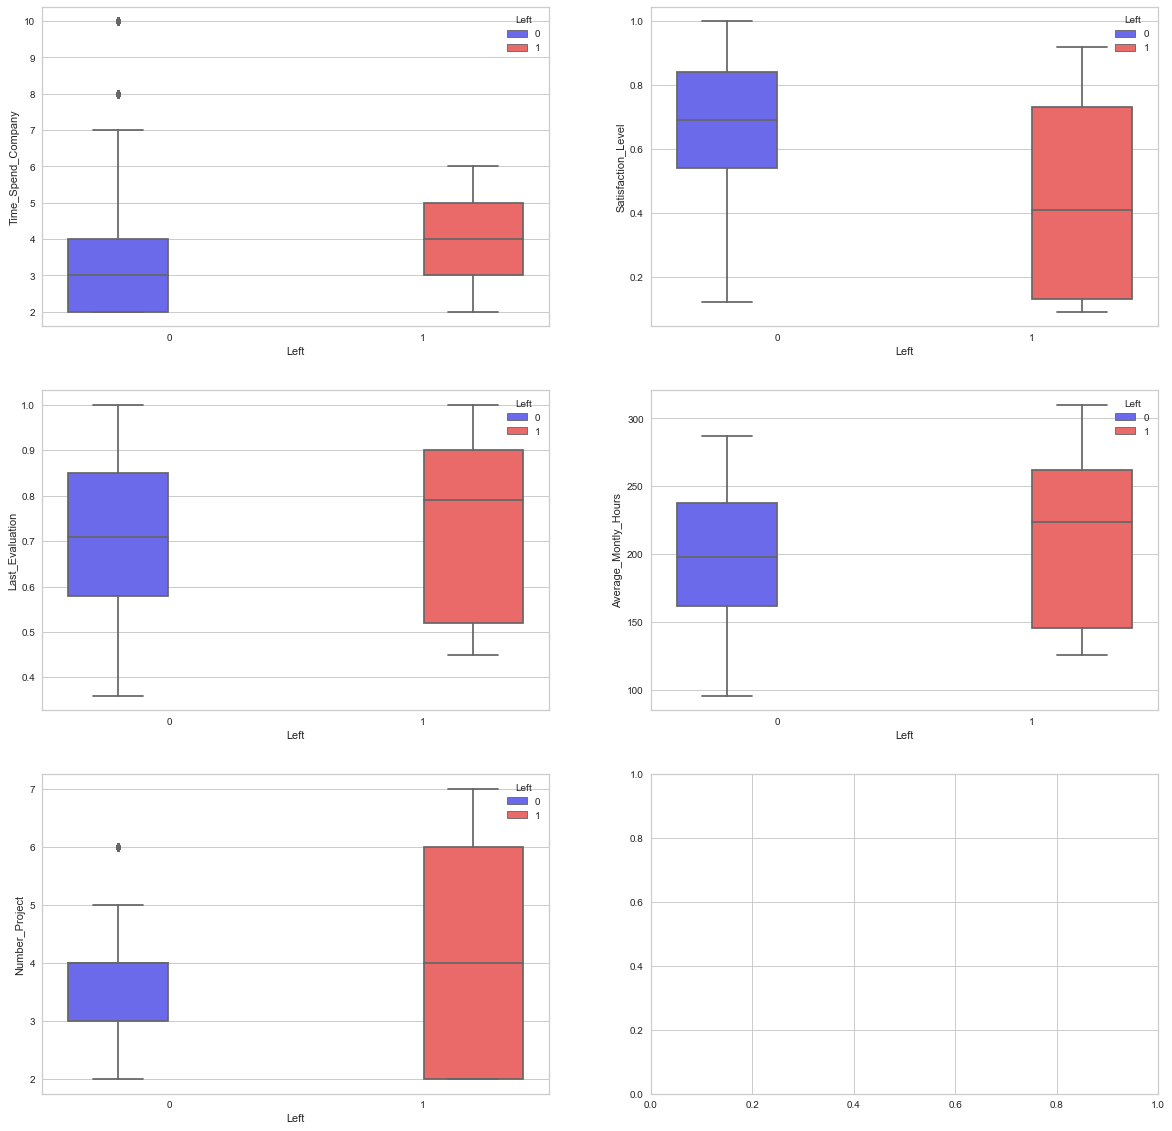

In [192]:
features=['Number_Project','Time_Spend_Company','Work_Accident','Left', 'Promotion_Last_5Years','Departments','Salary']
fig, axarr = plt.subplots(3,2 , figsize=(20, 20))
ax= sns.boxplot(y='Time_Spend_Company',x = 'Left', hue = 'Left',data = df, ax=axarr[0][0],palette = "seismic")
sns.boxplot(y='Satisfaction_Level',x = 'Left', hue = 'Left',data = df , ax=axarr[0][1],palette = 'seismic')
sns.boxplot(y='Last_Evaluation',x = 'Left', hue = 'Left',data = df, ax=axarr[1][0],palette = 'seismic')
sns.boxplot(y='Average_Montly_Hours',x = 'Left', hue = 'Left',data = df, ax=axarr[1][1],palette = 'seismic')
sns.boxplot(y='Number_Project',x = 'Left', hue = 'Left',data = df, ax=axarr[2][0],palette = 'seismic')
plt.show()

In [193]:
# Alternative
plt.figure(figsize = (20,24))
plt.subplot(621)
sns.boxplot(y = "Satisfaction_Level", x = "Left",  data = df)
plt.subplot(622)
sns.boxplot(y = "Average_Montly_Hours", x = "Left", data = df)
plt.subplot(623)
sns.boxplot(y = "Last_Evaluation", x = "Left", data = df)
plt.subplot(624)
sns.boxplot(y = "Time_Spend_Company", x = "Left", data = df)
plt.subplot(625)
sns.boxplot(y='Number_Project',x = 'Left', data = df);

In [194]:
df.drop(["Satisfaction_Class", "Last_Evaluation_Class", "Average_Montly_Hours_Class", "Promotion_Class"], axis=1, inplace=True)

In [197]:
df5=df.copy()

In [196]:
df.head(3)

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Montly_Hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   

   Time_Spend_Company  Work_Accident  Promotion_Last_5Years  Salary  \
0                   3              0                      0     low   
1                   6              0                      0  medium   
2                   4              0                      0  medium   

  Departments  Left  
0       sales     1  
1       sales     1  
2       sales     1

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [198]:
df.Salary = df.Salary.map({"low":1, "medium" : 2, "high" : 3})

In [199]:
df1 = pd.get_dummies(data=df) # for Logistic and KNN Models.

In [200]:
df1.head()

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Montly_Hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   
3               0.720            0.870               5                   223   
4               0.370            0.520               2                   159   

   Time_Spend_Company  Work_Accident  Promotion_Last_5Years  Salary  Left  \
0                   3              0                      0       1     1   
1                   6              0                      0       2     1   
2                   4              0                      0       2     1   
3                   5              0                      0       1     1   
4                   3              0                      0       1     1   

   Departments_IT  Departments_RandD  Departments_accounting  Departments_hr  \
0               0                  0                       0               0   
1               0                  0                       0               0   
2               0                  0                       0               0   
3               0                  0                       0               0   
4               0                  0                       0               0   

   Departments_management  Departments_marketing  Departments_product_mng  \
0                       0                      0                        0   
1                       0                      0                        0   
2                       0                      0                        0   
3                       0                      0                        0   
4                       0                      0                        0   

   Departments_sales  Departments_support  Departments_technical  
0                  1                    0                      0  
1                  1                    0                      0  
2                  1                    0                      0  
3                  1                    0                      0  
4                  1                    0                      0

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [201]:
df2 = df.copy()  # for Tree Base models.

In [202]:
cat = df2.select_dtypes("object").columns
cat

Index(['Departments'], dtype='object')

In [203]:
from sklearn.preprocessing import OrdinalEncoder

In [204]:
enc = OrdinalEncoder()

In [206]:
df2[cat] = enc.fit_transform(df2[cat])

In [207]:
df2

Satisfaction_Level  Last_Evaluation  Number_Project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       Average_Montly_Hours  Time_Spend_Company  Work_Accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       Promotion_Last_5Years  Salary  Departments  Left  
0                          0       1        7.000     1  
1                          0       2        7.000     1  
2                          0       2        7.000     1  
3                          0       1        7.000     1  
4                          0       1        7.000     1  
...                      ...     ...          ...   ...  
14994                      0       1        8.000     1  
14995                      0       1        8.000     1  
14996                      0       1        8.000     1  
14997                      0       1        8.000     1  
14998                      0       1        8.000     1  

[14999 rows x 10 columns]

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [208]:
df_kmeans = df1[["Satisfaction_Level","Last_Evaluation"]]
df_kmeans.head(3)

Satisfaction_Level  Last_Evaluation
0               0.380            0.530
1               0.800            0.860
2               0.110            0.880

In [209]:
scaler = MinMaxScaler()

In [210]:
df_kmeans_scaled = scaler.fit_transform(df_kmeans)
df_kmeans_scaled= pd.DataFrame(df_kmeans_scaled, columns=df_kmeans.columns)

In [211]:
from pyclustertend import hopkins

In [212]:
hopkins(df_kmeans_scaled, df_kmeans_scaled.shape[0])

0.10845479398992884

In [ ]:
# Alternative Elbow
#First : Get the Best KMeans 
from sklearn.cluster import KMeans

ks = range(1,10)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(df_kmeans_scaled)
    inertias.append(model.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

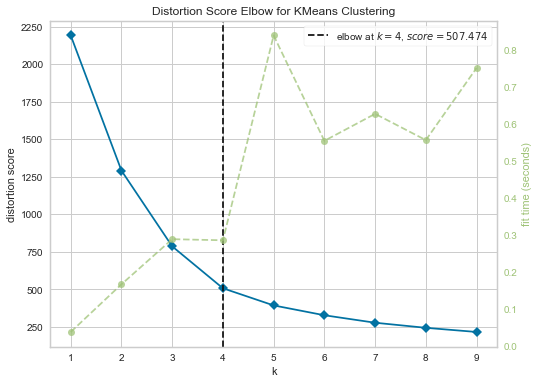

In [213]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=42)
f, ax = plt.subplots(figsize=(8, 6))
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df_kmeans_scaled)
visu.show();

In [214]:
from sklearn.metrics import silhouette_samples,silhouette_score
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_kmeans_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_kmeans_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.3933244786935099
Silhouette Score for 3 clusters: 0.4429157542315062
Silhouette Score for 4 clusters: 0.44888827967982764
Silhouette Score for 5 clusters: 0.4395361219752091
Silhouette Score for 6 clusters: 0.42065589044179713
Silhouette Score for 7 clusters: 0.41458427497894024
Silhouette Score for 8 clusters: 0.3997278991988672
Silhouette Score for 9 clusters: 0.3979350053133716


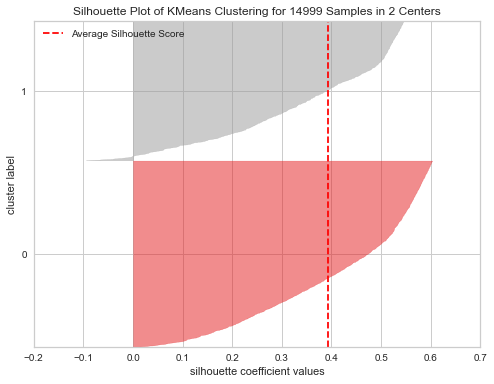

In [215]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df_kmeans_scaled)    
visualizer.poof();

In [216]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=2, random_state=42)
K_means_model.fit_predict(df_kmeans_scaled)

array([1, 0, 1, ..., 1, 1, 1])

In [217]:
K_means_model.labels_

array([1, 0, 1, ..., 1, 1, 1])

In [218]:
clusters = K_means_model.labels_
df_kmeans_scaled["predicted_clusters"] = clusters
df_kmeans_scaled["Left"] = df["Left"]

In [219]:
df.Left.value_counts(dropna=False)

0    11428
1     3571
Name: Left, dtype: int64

In [220]:
df_kmeans_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Satisfaction_Level  14999 non-null  float64
 1   Last_Evaluation     14999 non-null  float64
 2   predicted_clusters  14999 non-null  int32  
 3   Left                14999 non-null  int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 410.3 KB


In [221]:
df_kmeans_scaled["Left"].value_counts()

0    11428
1     3571
Name: Left, dtype: int64

In [222]:
df_kmeans_scaled.head(3)

Satisfaction_Level  Last_Evaluation  predicted_clusters  Left
0                   0.319            0.266                   1     1
1                   0.780            0.781                   0     1
2                   0.022            0.812                   1     1
3                   0.692            0.797                   0     1
4                   0.308            0.250                   1     1
...                   ...              ...                 ...   ...
14994               0.341            0.328                   1     1
14995               0.308            0.188                   1     1
14996               0.308            0.266                   1     1
14997               0.022            0.938                   1     1
14998               0.308            0.250                   1     1

[14999 rows x 4 columns]

In [223]:
df_kmeans_scaled[df_kmeans_scaled["Left"]==1].head(20)

Satisfaction_Level  Last_Evaluation  predicted_clusters  Left
0                0.319            0.266                   1     1
1                0.780            0.781                   0     1
2                0.022            0.812                   1     1
3                0.692            0.797                   0     1
4                0.308            0.250                   1     1
5                0.352            0.219                   1     1
6                0.011            0.641                   1     1
7                0.912            0.766                   0     1
8                0.879            1.000                   0     1
9                0.363            0.266                   1     1
10               0.396            0.281                   1     1
11               0.022            0.703                   1     1
12               0.824            0.875                   0     1
13               0.352            0.297                   1     1
14               0.297            0.313                   1     1
15               0.319            0.281                   1     1
16               0.396            0.172                   1     1
17               0.758            0.984                   0     1
18               0.396            0.234                   1     1
19               0.736            0.828                   0     1

In [224]:
df_kmeans_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Satisfaction_Level  14999 non-null  float64
 1   Last_Evaluation     14999 non-null  float64
 2   predicted_clusters  14999 non-null  int32  
 3   Left                14999 non-null  int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 410.3 KB


### iii. Visualize the Clusters

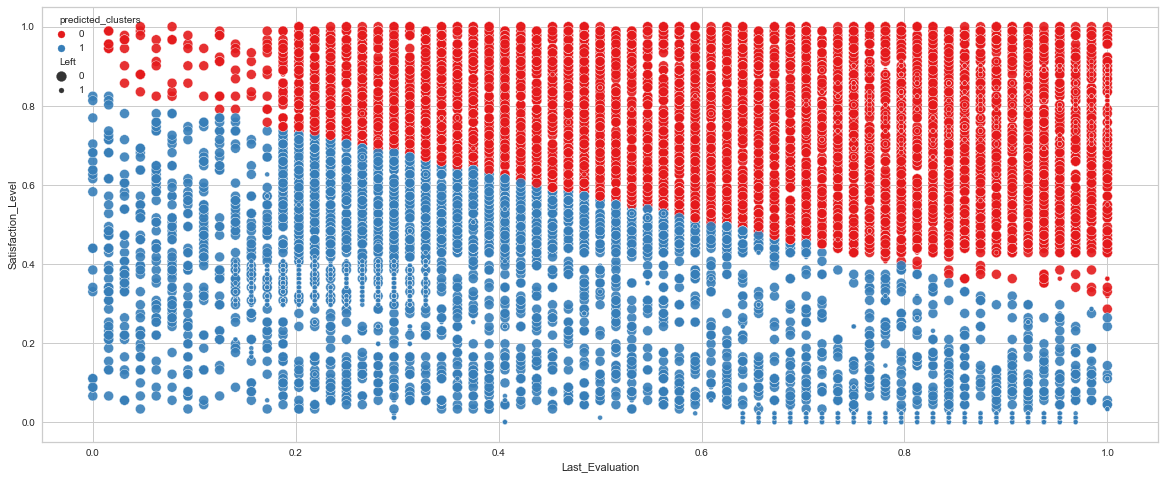

In [225]:
plt.figure(figsize = (20,8))

sns.scatterplot(y="Satisfaction_Level", x="Last_Evaluation", data=df_kmeans_scaled, hue="predicted_clusters", size="Left", palette="Set1", alpha=0.9); 

Text(0.5, 1.0, 'Satisfaction_Level-Last_Evaluation')

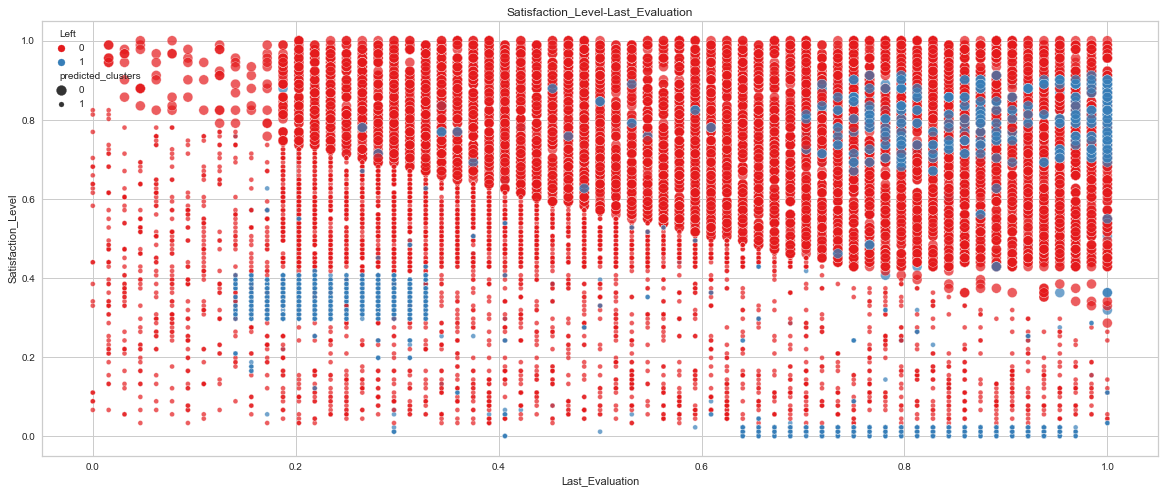

In [226]:
plt.figure(figsize = (20,8))

sns.scatterplot(x= "Last_Evaluation", y="Satisfaction_Level", data=df_kmeans_scaled, hue="Left", size="predicted_clusters", palette="Set1", alpha=0.7) # gerçek değerler- C= renklendirmeyi targeta göre yapıyor Xlabels
plt.title("Satisfaction_Level-Last_Evaluation")


In [227]:
df_kmeans_scaled.isnull().sum()

Satisfaction_Level    0
Last_Evaluation       0
predicted_clusters    0
Left                  0
dtype: int64

In [228]:

fig = px.scatter_3d(x=df_kmeans_scaled["Last_Evaluation"],
                   y=df_kmeans_scaled["Satisfaction_Level"],
                   z=df_kmeans_scaled["Left"],
                   color=df_kmeans_scaled.predicted_clusters, size_max=18,
                   labels = {"x": "Last_Evaluation",
                             "y": "Satisfaction_Level",
                             "z": "Left"},
                   hover_name=df_kmeans_scaled["predicted_clusters"])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [229]:
df_kmeans_scaled.groupby("predicted_clusters")["Satisfaction_Level", "Last_Evaluation"].mean()

Satisfaction_Level  Last_Evaluation
predicted_clusters                                     
0                                0.759            0.661
1                                0.328            0.417

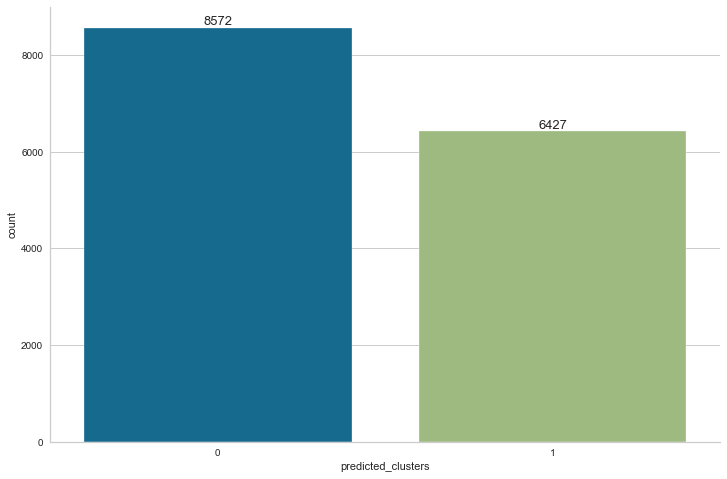

In [230]:
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.countplot(df_kmeans_scaled['predicted_clusters'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar_label(ax.containers[0], fontsize=13, label_type="edge");

In [231]:
fig = px.pie(df_kmeans_scaled, values = df_kmeans_scaled['predicted_clusters'].value_counts(), 
             names = (df_kmeans_scaled['predicted_clusters'].value_counts()).index, 
             title = 'Predicted_Clusters Distribution')
fig.show()

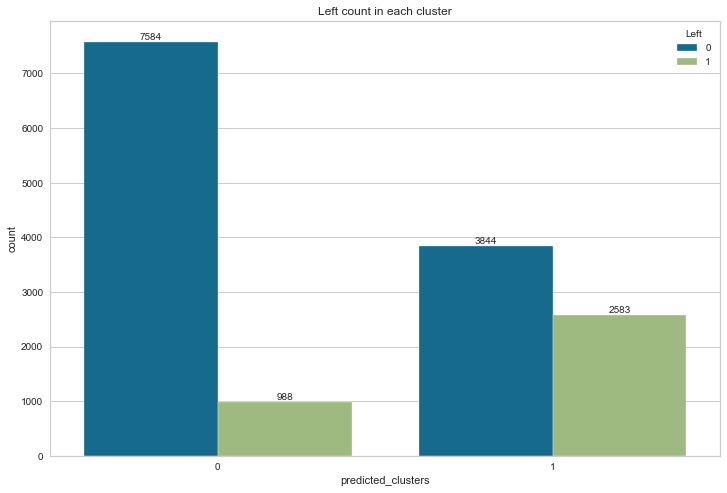

In [232]:
plt.rcParams["figure.figsize"] = (12,8)
plt.title("Left count in each cluster")
plt.ylabel("Salary")
ax =sns.countplot(x=df_kmeans_scaled.predicted_clusters, hue=df.Left) 
ax.bar_label(ax.containers[0], label_type="edge")
ax.bar_label(ax.containers[1], label_type="edge")
plt.show();

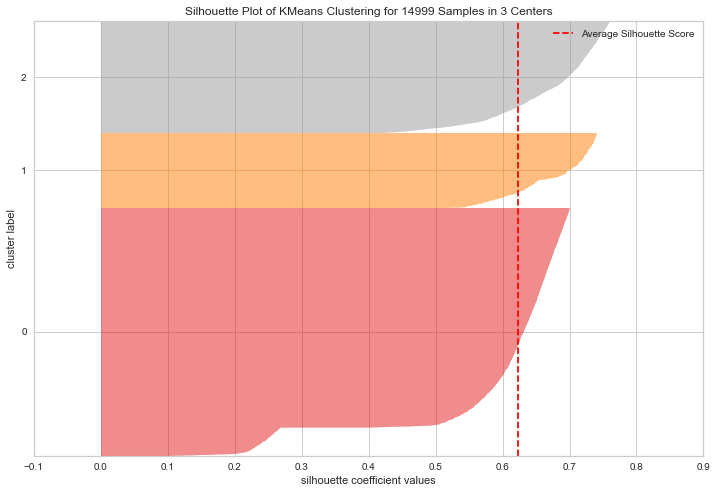

In [233]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df_kmeans_scaled)    
visualizer.poof();

In [234]:
k_means_model = KMeans(n_clusters =3, random_state = 101)
k_means_model.fit_predict(df_kmeans_scaled)
labels = k_means_model.labels_
labels

array([2, 0, 2, ..., 2, 2, 2])

In [235]:
df_kmeans_scaled['predicted_cluster3'] = labels
df_kmeans_scaled

Satisfaction_Level  Last_Evaluation  predicted_clusters  Left  \
0                   0.319            0.266                   1     1   
1                   0.780            0.781                   0     1   
2                   0.022            0.812                   1     1   
3                   0.692            0.797                   0     1   
4                   0.308            0.250                   1     1   
...                   ...              ...                 ...   ...   
14994               0.341            0.328                   1     1   
14995               0.308            0.188                   1     1   
14996               0.308            0.266                   1     1   
14997               0.022            0.938                   1     1   
14998               0.308            0.250                   1     1   

       predicted_cluster3  
0                       2  
1                       0  
2                       2  
3                       0  
4                       2  
...                   ...  
14994                   2  
14995                   2  
14996                   2  
14997                   2  
14998                   2  

[14999 rows x 5 columns]

In [236]:
silhouette_score(df_kmeans_scaled, k_means_model.labels_)

0.7206447913169388

<AxesSubplot:xlabel='Last_Evaluation', ylabel='Satisfaction_Level'>

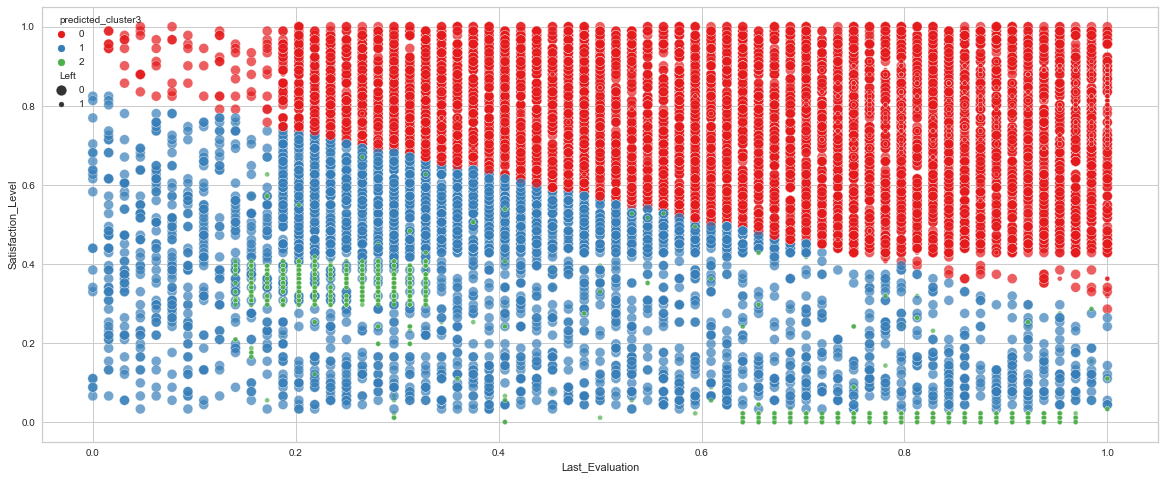

In [237]:
plt.figure(figsize = (20,8))

sns.scatterplot(y="Satisfaction_Level", x="Last_Evaluation", data=df_kmeans_scaled, hue="predicted_cluster3", size="Left", palette="Set1", alpha=0.7) 

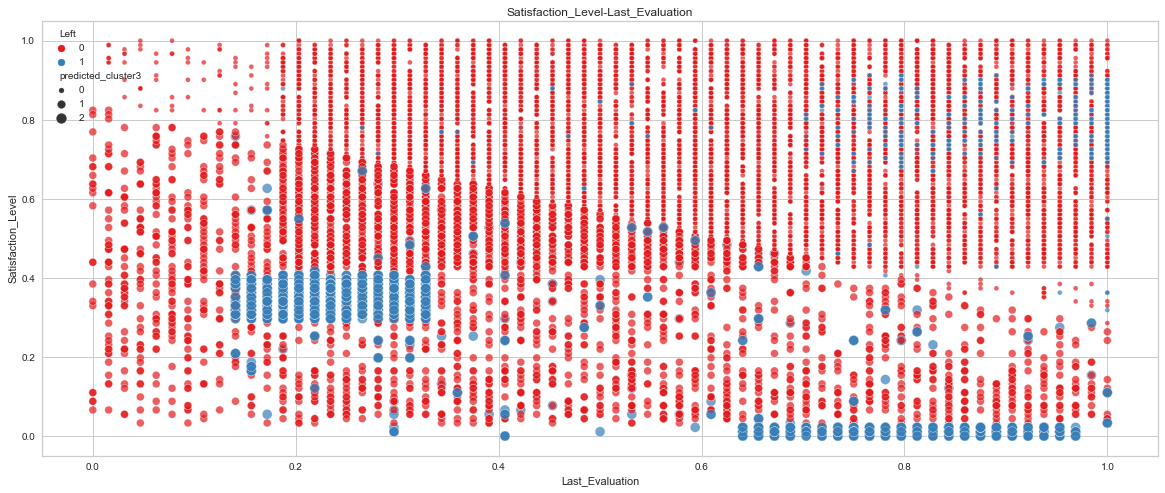

In [238]:
plt.figure(figsize = (20,8))

sns.scatterplot(x= "Last_Evaluation", y="Satisfaction_Level", data=df_kmeans_scaled, hue="Left", size="predicted_cluster3", palette="Set1", alpha=0.7) # gerçek değerler- C= renklendirmeyi targeta göre yapıyor Xlabels
plt.title("Satisfaction_Level-Last_Evaluation");


In [239]:
fig = px.scatter_3d(x=df_kmeans_scaled["Last_Evaluation"],
                   y=df_kmeans_scaled["Satisfaction_Level"],
                   z=df_kmeans_scaled["Left"],
                   color=df_kmeans_scaled.predicted_cluster3, size_max=18,
                   labels = {"x": "Last_Evaluation",
                             "y": "Satisfaction_Level",
                             "z": "Left"},
                   hover_name=df_kmeans_scaled["predicted_clusters"])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [240]:
df_kmeans_scaled.groupby(['predicted_cluster3', 'Left'])["Satisfaction_Level", "Last_Evaluation"].mean()

Satisfaction_Level  Last_Evaluation
predicted_cluster3 Left                                     
0                  0                  0.755            0.635
                   1                  0.787            0.860
1                  0                  0.394            0.398
2                  1                  0.231            0.445

In [241]:
fig = px.pie(df_kmeans_scaled, values = df_kmeans_scaled['predicted_cluster3'].value_counts(), 
             names = (df_kmeans_scaled['predicted_cluster3'].value_counts()).index, 
             title = 'Predicted_Clusters Distribution')
fig.show()

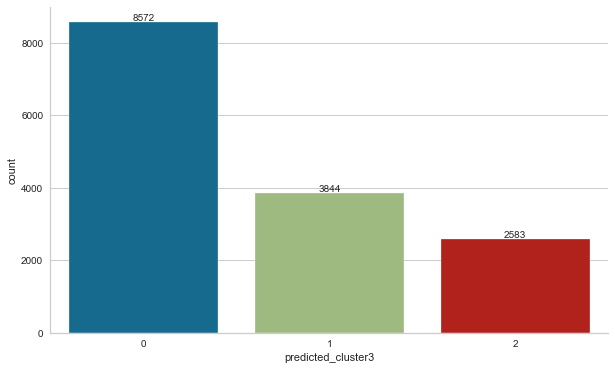

In [242]:
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.countplot(df_kmeans_scaled['predicted_cluster3'],data=df_kmeans_scaled)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar_label(ax.containers[0], label_type="edge");

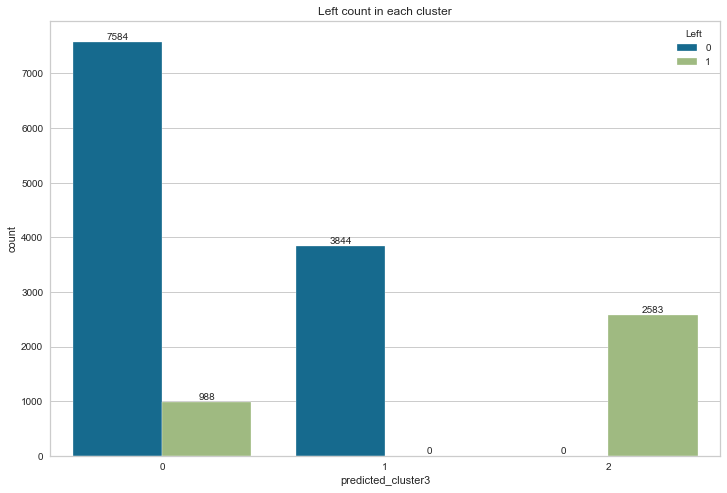

In [243]:
plt.rcParams["figure.figsize"] = (12,8)
plt.title("Left count in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df_kmeans_scaled.predicted_cluster3, hue=df.Left) 
ax.bar_label(ax.containers[0], label_type="edge")
ax.bar_label(ax.containers[1], label_type="edge");

## 5. Model Building

In [244]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OrdinalEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [245]:
df2

Satisfaction_Level  Last_Evaluation  Number_Project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       Average_Montly_Hours  Time_Spend_Company  Work_Accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       Promotion_Last_5Years  Salary  Departments  Left  
0                          0       1        7.000     1  
1                          0       2        7.000     1  
2                          0       2        7.000     1  
3                          0       1        7.000     1  
4                          0       1        7.000     1  
...                      ...     ...          ...   ...  
14994                      0       1        8.000     1  
14995                      0       1        8.000     1  
14996                      0       1        8.000     1  
14997                      0       1        8.000     1  
14998                      0       1        8.000     1  

[14999 rows x 10 columns]

In [247]:
X = df2.drop("Left", axis=1)
y = df2["Left"]

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [254]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (10499, 9)
Train target shape   :  (10499,)
Test features shape  :  (4500, 9)
Test target shape    :  (4500,)


### #Gradient Boosting Classifier

#### Model Building

In [255]:
grad_model = GradientBoostingClassifier(random_state=42)

In [256]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [257]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [258]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[3382   47]
 [  69 1002]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3429
           1       0.96      0.94      0.95      1071

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500


Train_Set
[[7942   57]
 [ 172 2328]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7999
           1       0.98      0.93      0.95      2500

    accuracy                           0.98     10499
   macro avg       0.98      0.96      0.97     10499
weighted avg       0.98      0.98      0.98     10499



### CV

In [259]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.977
test_precision   0.974
test_recall      0.929
test_f1          0.951
dtype: float64

### Grid Search

In [260]:
param_grid = {"n_estimators":[300, 400, 500],
            "subsample":[0.5, 1],
            "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.1, 0.2, 0.3],
            "max_depth":[5,6,7,8]}

In [261]:
#sklearn.metrics.SCORERS.keys()

In [262]:
gb_model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [263]:
grid.best_params_

{'learning_rate': 0.3,
 'max_depth': 8,
 'max_features': 4,
 'n_estimators': 300,
 'subsample': 1}

In [264]:
grid.best_score_

0.977508415987085

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [265]:
eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[3417   12]
 [  33 1038]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500


Train_Set
[[7999    0]
 [   0 2500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [513]:
grad_final=  GradientBoostingClassifier(max_features= 3, n_estimators = 500, subsample = 1, learning_rate= 0.1, max_depth=4, random_state=42)
grad_final.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features=3, n_estimators=500,
                           random_state=42, subsample=1)

In [514]:
y_pred = grad_final.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred) 

In [515]:
eval_metric(grad_final, X_train, y_train, X_test, y_test)

Test_Set
[[3405   24]
 [  41 1030]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500


Train_Set
[[7991    8]
 [  30 2470]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.99      0.99      2500

    accuracy                           1.00     10499
   macro avg       1.00      0.99      0.99     10499
weighted avg       1.00      1.00      1.00     10499



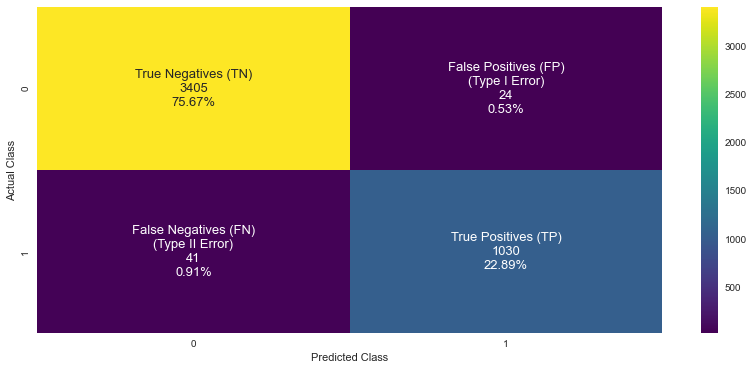

In [516]:
plt.figure(figsize=(14,6))

y_pred = grad_final.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

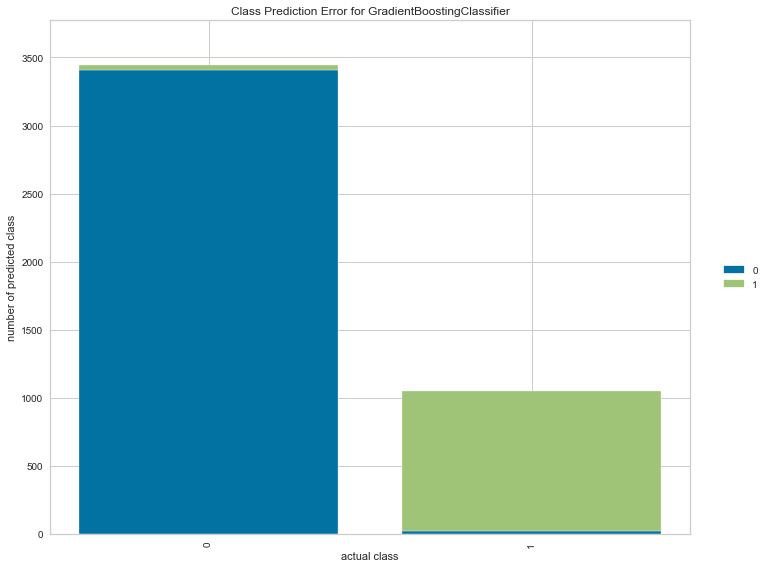

In [517]:
visualizer = ClassPredictionError(grad_final)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

### Feature Importances

max_depth=4, max_features=3, n_estimators=500, random_state=42, subsample=1, , learning_rate= 0.3

In [518]:
model = GradientBoostingClassifier(max_depth=4, max_features=3, n_estimators=500, random_state=42, subsample=1, learning_rate= 0.3)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

grad_importance
Promotion_Last_5Years            0.001
Departments                      0.003
Salary                           0.003
Work_Accident                    0.005
Average_Montly_Hours             0.107
Last_Evaluation                  0.140
Number_Project                   0.213
Time_Spend_Company               0.251
Satisfaction_Level               0.276

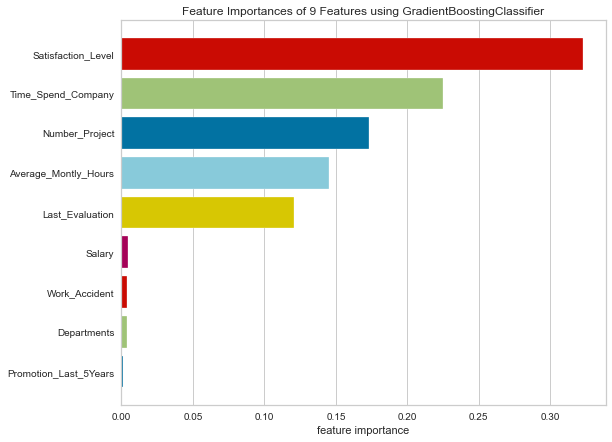

<AxesSubplot:title={'center':'Feature Importances of 9 Features using GradientBoostingClassifier'}, xlabel='feature importance'>

In [519]:
# feature importance  
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(grad_final, relative=False, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(620, 450))
viz.fit(X_train, y_train)
viz.show()

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [271]:
#pip install yellowbrick

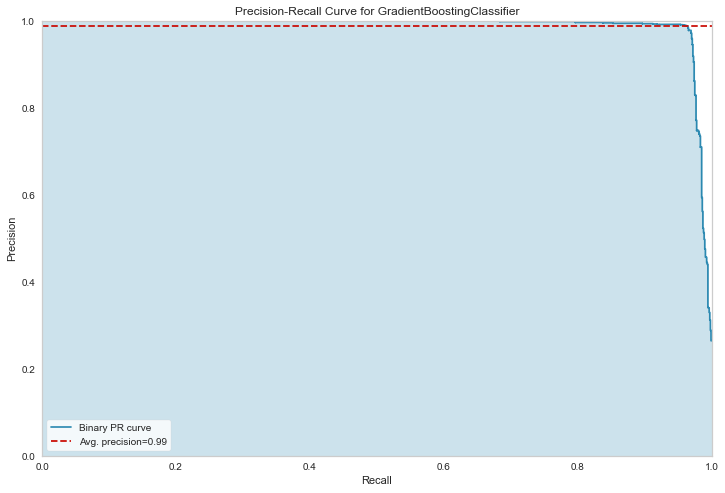

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [272]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(GradientBoostingClassifier(max_depth=4, max_features=3, n_estimators=500, random_state=42, subsample=1, learning_rate= 0.3))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### Prediction

In [273]:
sample = [{"Satisfaction_Level": 0.65,"Last_Evaluation":0.55,"Number_Project":3,"Average_Montly_Hours":200,"Time_Spend_Company":5,"Work_Accident":0,"Promotion_Last_5Years":0,"Salary":1, "Departments":"support"}]

In [274]:
sample_pred = pd.DataFrame(sample)

In [275]:
sample_pred

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Montly_Hours  \
0               0.650            0.550               3                   200   

   Time_Spend_Company  Work_Accident  Promotion_Last_5Years  Salary  \
0                   5              0                      0       1   

  Departments  
0     support

In [276]:
sample_cat = sample_pred.select_dtypes("object").columns

In [277]:
sample_pred[sample_cat] = enc.fit_transform(sample_pred[sample_cat])

In [278]:
sample_pred

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Montly_Hours  \
0               0.650            0.550               3                   200   

   Time_Spend_Company  Work_Accident  Promotion_Last_5Years  Salary  \
0                   5              0                      0       1   

   Departments  
0        0.000

In [520]:
grad_final.predict(sample_pred)

array([0], dtype=int64)

### Pickle for Deployment

In [280]:
import pickle

In [521]:
gradient_boosting_classifier = pickle.dump(grad_final, open('gradient_boosting_model.pkl', 'wb'))

In [522]:
pickle.dump(enc,open("encoder.pkl","wb"))

### #KNeighbors Classifier

#### Model Building

In [368]:
X = df1.drop("Left", axis=1)
y = df1["Left"]

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [370]:
scaler = MinMaxScaler()

In [371]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [372]:
from sklearn.neighbors import KNeighborsClassifier

In [373]:
knn_model = KNeighborsClassifier()

In [374]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [375]:
y_pred = knn_model.predict(X_test_scaled)

In [376]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

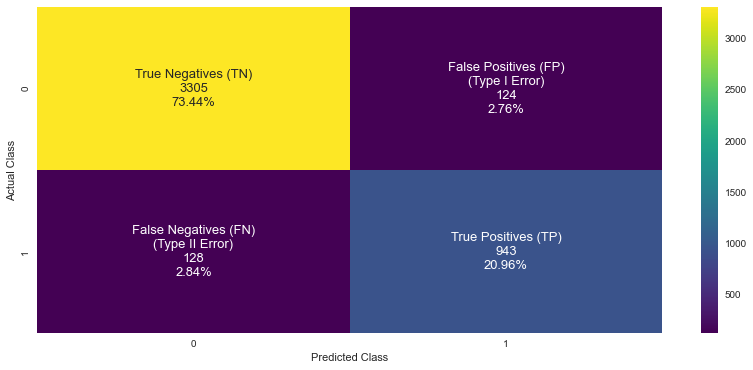

In [380]:
plt.figure(figsize=(14,6))

y_pred = knn_model.predict(X_test_scaled)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

In [382]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3305  124]
 [ 128  943]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3429
           1       0.88      0.88      0.88      1071

    accuracy                           0.94      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500



### Elbow Method for Choosing Reasonable K Values

In [384]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

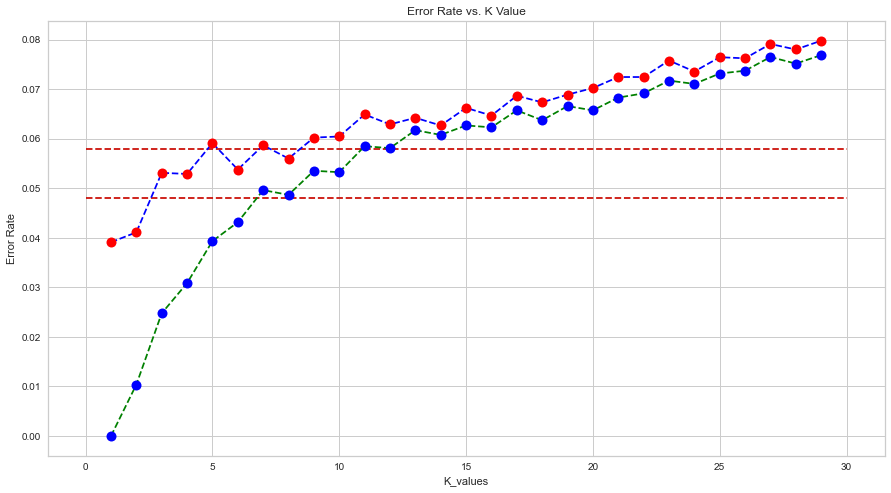

In [385]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.058, xmin = 0, xmax = 30, colors= 'r', linestyles="--") 
plt.hlines(y=0.048, xmin = 0, xmax = 30, colors= 'r', linestyles="--") 

### Scores by Various K Values

In [386]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=5

Test_Set
[[3282  147]
 [ 119  952]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3429
           1       0.87      0.89      0.88      1071

    accuracy                           0.94      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500


Train_Set
[[7765  234]
 [ 179 2321]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7999
           1       0.91      0.93      0.92      2500

    accuracy                           0.96     10499
   macro avg       0.94      0.95      0.95     10499
weighted avg       0.96      0.96      0.96     10499



In [387]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=6

Test_Set
[[3314  115]
 [ 127  944]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3429
           1       0.89      0.88      0.89      1071

    accuracy                           0.95      4500
   macro avg       0.93      0.92      0.93      4500
weighted avg       0.95      0.95      0.95      4500


Train_Set
[[7825  174]
 [ 279 2221]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7999
           1       0.93      0.89      0.91      2500

    accuracy                           0.96     10499
   macro avg       0.95      0.93      0.94     10499
weighted avg       0.96      0.96      0.96     10499



In [388]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled,y_train)
print('WITH K=7\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set
[[3288  141]
 [ 123  948]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3429
           1       0.87      0.89      0.88      1071

    accuracy                           0.94      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500


Train_Set
[[7740  259]
 [ 262 2238]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7999
           1       0.90      0.90      0.90      2500

    accuracy                           0.95     10499
   macro avg       0.93      0.93      0.93     10499
weighted avg       0.95      0.95      0.95     10499



### Cross Validate For Optimal K Value

In [389]:
from sklearn.model_selection import cross_val_score, cross_validate

In [390]:
model = KNeighborsClassifier(n_neighbors=6)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.019       0.366          0.950           0.909        0.880    0.894
2      0.004       0.485          0.949           0.877        0.912    0.894
3      0.005       0.557          0.949           0.880        0.908    0.894
4      0.003       0.361          0.950           0.909        0.880    0.894
5      0.004       0.350          0.958           0.919        0.904    0.911
6      0.005       0.377          0.936           0.873        0.856    0.865
7      0.002       0.312          0.931           0.868        0.840    0.854
8      0.002       0.309          0.940           0.879        0.868    0.873
9      0.004       0.316          0.937           0.887        0.844    0.865
10     0.003       0.299          0.947           0.904        0.868    0.886

In [391]:
df_scores.mean()[2:]

test_accuracy    0.945
test_precision   0.890
test_recall      0.876
test_f1          0.883
dtype: float64

### GridSearch for KNN

In [392]:
knn_grid = KNeighborsClassifier()

In [393]:
k_values= range(3,15)

In [394]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [395]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=5, scoring= 'f1')

In [396]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 15), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [397]:
knn_grid_model.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

#### Evaluating Model Performance

In [398]:
print('WITH K=8\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=8

Test_Set
[[3300  129]
 [  46 1025]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3429
           1       0.89      0.96      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.96      0.95      4500
weighted avg       0.96      0.96      0.96      4500


Train_Set
[[7999    0]
 [   0 2500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [400]:
knn_final = KNeighborsClassifier(n_neighbors=6)

knn_final.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn_final, X_train_scaled, y_train, X_test_scaled, y_test) 

WITH K=6

Test_Set
[[3314  115]
 [ 127  944]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3429
           1       0.89      0.88      0.89      1071

    accuracy                           0.95      4500
   macro avg       0.93      0.92      0.93      4500
weighted avg       0.95      0.95      0.95      4500


Train_Set
[[7825  174]
 [ 279 2221]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7999
           1       0.93      0.89      0.91      2500

    accuracy                           0.96     10499
   macro avg       0.95      0.93      0.94     10499
weighted avg       0.96      0.96      0.96     10499



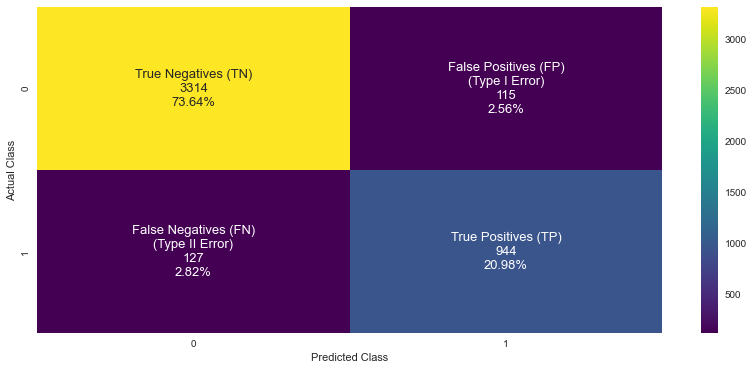

In [401]:
plt.figure(figsize=(14,6))

y_pred = knn_final.predict(X_test_scaled)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

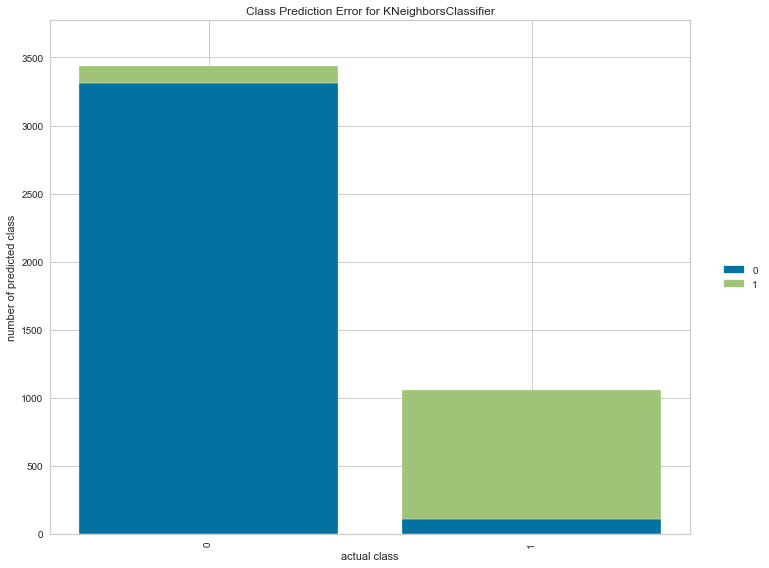

In [403]:
visualizer = ClassPredictionError(knn_final)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)

visualizer.poof();

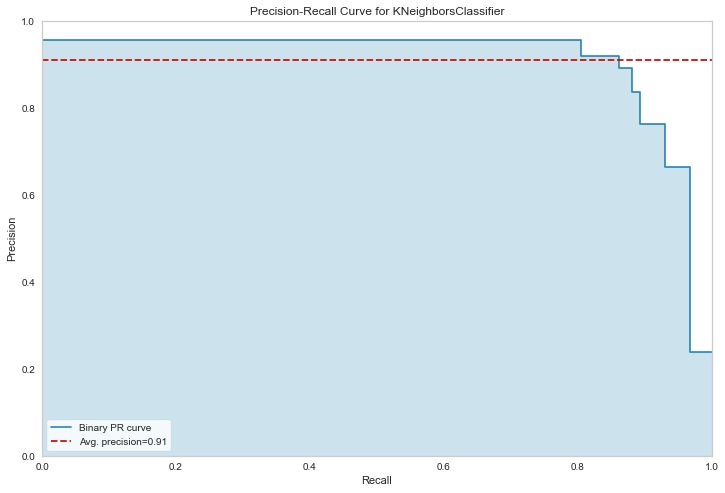

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [404]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(knn_final, random_state=101)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show()

In [405]:
y_pred = knn_final.predict(X_test_scaled)

knn_final_f1 = f1_score(y_test, y_pred)
knn_final_recall = recall_score(y_test, y_pred)
knn_final_precision = precision_score(y_test, y_pred) 

#### Prediction

In [406]:
knn_sample = [{"Satisfaction_Level": 0.65,"Last_Evaluation":0.55,"number_project":3,"Average_Montly_Hours":200,"time_spend_company":5,"Work_accident":0,"promotion_last_5years":0,"salary":1, "Departments":"support"}]

In [407]:
knn_sample_pred = pd.DataFrame(knn_sample)
knn_sample_pred

Satisfaction_Level  Last_Evaluation  number_project  Average_Montly_Hours  \
0               0.650            0.550               3                   200   

   time_spend_company  Work_accident  promotion_last_5years  salary  \
0                   5              0                      0       1   

  Departments  
0     support

In [408]:
df2

Satisfaction_Level  Last_Evaluation  Number_Project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       Average_Montly_Hours  Time_Spend_Company  Work_Accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       Promotion_Last_5Years  Salary  Departments  Left  
0                          0       1        7.000     1  
1                          0       2        7.000     1  
2                          0       2        7.000     1  
3                          0       1        7.000     1  
4                          0       1        7.000     1  
...                      ...     ...          ...   ...  
14994                      0       1        8.000     1  
14995                      0       1        8.000     1  
14996                      0       1        8.000     1  
14997                      0       1        8.000     1  
14998                      0       1        8.000     1  

[14999 rows x 10 columns]

In [409]:
columns = ['Satisfaction_Level', 'Last_Evaluation', 'Number_Project',
       'Average_Montly_Hours', 'Time_Spend_Company', 'Work_Accident',
       'Promotion_Last_5Years', "Salary", "Departments_IT",'Departments_RandD',
       'Departments_accounting', 'Departments_hr', 'Departments_management',
       'Departments_marketing', 'Departments_product_mng',
       'Departments_sales', 'Departments_support', 'Departments_technical']

In [410]:
knn_sample_pred = pd.get_dummies(knn_sample_pred).reindex(columns=columns, fill_value=0)
knn_sample_pred

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Montly_Hours  \
0               0.650            0.550               0                   200   

   Time_Spend_Company  Work_Accident  Promotion_Last_5Years  Salary  \
0                   0              0                      0       0   

   Departments_IT  Departments_RandD  Departments_accounting  Departments_hr  \
0               0                  0                       0               0   

   Departments_management  Departments_marketing  Departments_product_mng  \
0                       0                      0                        0   

   Departments_sales  Departments_support  Departments_technical  
0                  0                    1                      0

In [411]:
knn_sample_pred_scaled =  scaler.transform(knn_sample_pred)

In [412]:
knn_sample_pred_scaled

array([[ 0.61538462,  0.296875  , -0.4       ,  0.48598131, -0.25      ,
         0.        ,  0.        , -0.5       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ]])

In [413]:
knn_final.predict(knn_sample_pred_scaled)

array([0], dtype=int64)

### Pickle for Deployment

In [414]:
pickle.dump(knn_final, open('knn_final_pickle.pkl', 'wb'))

In [415]:
pickle.dump(scaler,open("scaler_for_knn.joblib","wb"))

### #Random Forest Classifier

#### Model Building

In [422]:
df2

Satisfaction_Level  Last_Evaluation  Number_Project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       Average_Montly_Hours  Time_Spend_Company  Work_Accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       Promotion_Last_5Years  Salary  Departments  Left  
0                          0       1        7.000     1  
1                          0       2        7.000     1  
2                          0       2        7.000     1  
3                          0       1        7.000     1  
4                          0       1        7.000     1  
...                      ...     ...          ...   ...  
14994                      0       1        8.000     1  
14995                      0       1        8.000     1  
14996                      0       1        8.000     1  
14997                      0       1        8.000     1  
14998                      0       1        8.000     1  

[14999 rows x 10 columns]

In [423]:
X = df2.drop("Left",axis=1)
y = df2.Left

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [425]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [426]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[3421    8]
 [  34 1037]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500


Train_Set
[[7999    0]
 [   0 2500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [427]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.991
test_precision   0.994
test_recall      0.968
test_f1          0.981
dtype: float64

#### Evaluating Model Performance

In [428]:
param_grid = {'n_estimators':[200,300,400],
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[7, 9, 11],
             'min_samples_split':[2,3,5]}

In [429]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "f1", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [430]:
rf_grid_model.best_params_

{'max_depth': 11,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [431]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[3422    7]
 [  53 1018]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3429
           1       0.99      0.95      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500


Train_Set
[[7988   11]
 [  50 2450]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7999
           1       1.00      0.98      0.99      2500

    accuracy                           0.99     10499
   macro avg       0.99      0.99      0.99     10499
weighted avg       0.99      0.99      0.99     10499



In [501]:
rf_final= RandomForestClassifier(class_weight = "balanced", random_state=42, max_depth= 11, max_features = 4, min_samples_leaf=2, min_samples_split= 2, n_estimators=  200, criterion="gini")
rf_final.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=11, max_features=4,
                       min_samples_leaf=2, n_estimators=200, random_state=42)

In [502]:
eval_metric(rf_final, X_train, y_train, X_test, y_test)

Test_Set
[[3420    9]
 [  58 1013]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3429
           1       0.99      0.95      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.98      4500


Train_Set
[[7983   16]
 [  64 2436]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7999
           1       0.99      0.97      0.98      2500

    accuracy                           0.99     10499
   macro avg       0.99      0.99      0.99     10499
weighted avg       0.99      0.99      0.99     10499



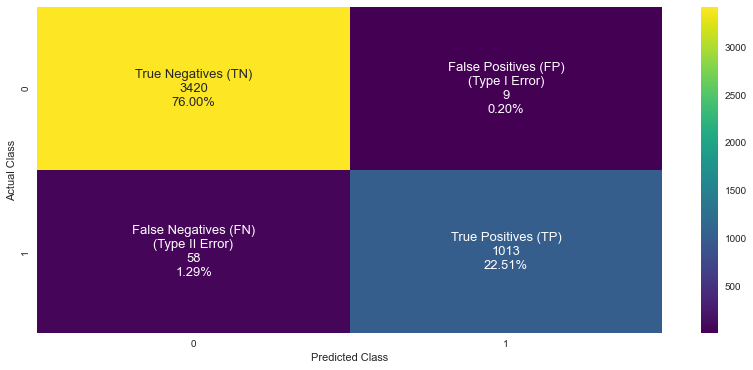

In [503]:
plt.figure(figsize=(14,6))

y_pred = rf_final.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

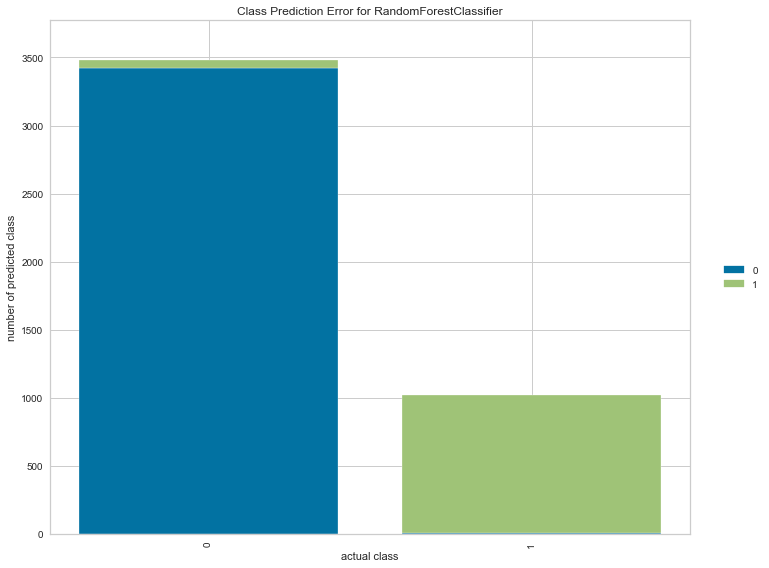

In [504]:
visualizer = ClassPredictionError(rf_final)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

In [505]:
y_pred = rf_final.predict(X_test)

rf_grid_model_f1 = f1_score(y_test, y_pred)
rf_grid_model_recall = recall_score(y_test, y_pred)
rf_grid_model_precision = precision_score(y_test, y_pred)

### Feature Importance

In [506]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
Satisfaction_Level                  0.334
Time_Spend_Company                  0.180
Number_Project                      0.180
Average_Montly_Hours                0.155
Last_Evaluation                     0.122
Departments                         0.013
Salary                              0.009
Work_Accident                       0.005
Promotion_Last_5Years               0.001

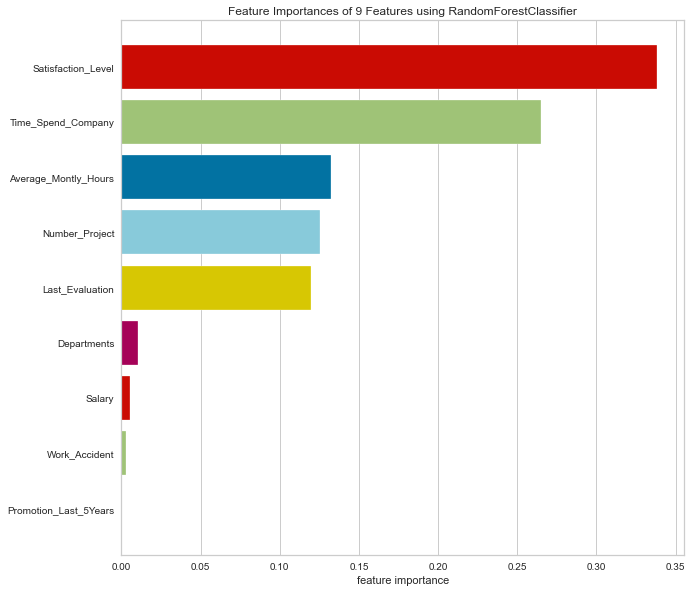

<AxesSubplot:title={'center':'Feature Importances of 9 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [507]:
# feature importance  
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rf_final, relative=False, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(700, 600))
viz.fit(X_train, y_train)
viz.show()

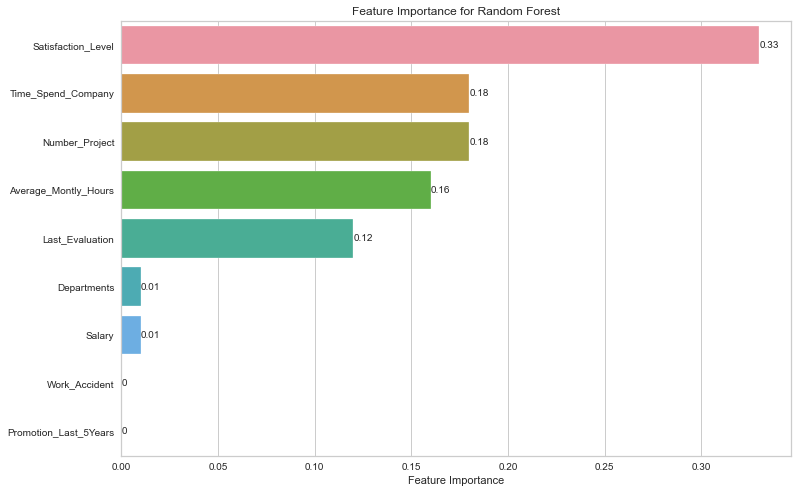

In [434]:
# Alternative 
ax = sns.barplot(x=rf_feature_imp["Feature Importance"].round(2), y=rf_feature_imp.index)
ax.bar_label(ax.containers[0], label_type="edge")
plt.title("Feature Importance for Random Forest")
plt.show()

### Prediction

In [447]:
prediction = [{"Satisfaction_Level": 0.65,"Last_Evaluation":0.55,"Number_Project":3,"Average_Montly_Hours":200,"Time_Spend_company":5,"Work_Accident" :0, "Promotion_Last_5Years" : 0, "Salary": 1 , "Departments":"support"}]

In [449]:
pred = pd.DataFrame(prediction)

In [450]:
pred

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Montly_Hours  \
0               0.650            0.550               3                   200   

   Time_Spend_company  Work_Accident  Promotion_Last_5Years  Salary  \
0                   5              0                      0       1   

  Departments  
0     support

In [451]:
cat3 = pred.select_dtypes("object").columns
cat3

Index(['Departments'], dtype='object')

In [452]:
pred[cat3]

Departments
0     support

In [453]:
pred[cat3] = enc.transform(pred[cat3])

In [454]:
pred

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Montly_Hours  \
0               0.650            0.550               3                   200   

   Time_Spend_company  Work_Accident  Promotion_Last_5Years  Salary  \
0                   5              0                      0       1   

   Departments  
0        0.000

In [455]:
rf_grid_model.predict(pred)

array([0], dtype=int64)

### Pickle for Deployment

In [456]:
pickle.dump(rf_grid_model, open('rf_grid_model.pkl', 'wb'))

In [457]:
pickle.dump(enc,open("encoder.pkl","wb"))

In [458]:
pickle.dump(scaler,open("scaler.pkl","wb"))

### Models Compare

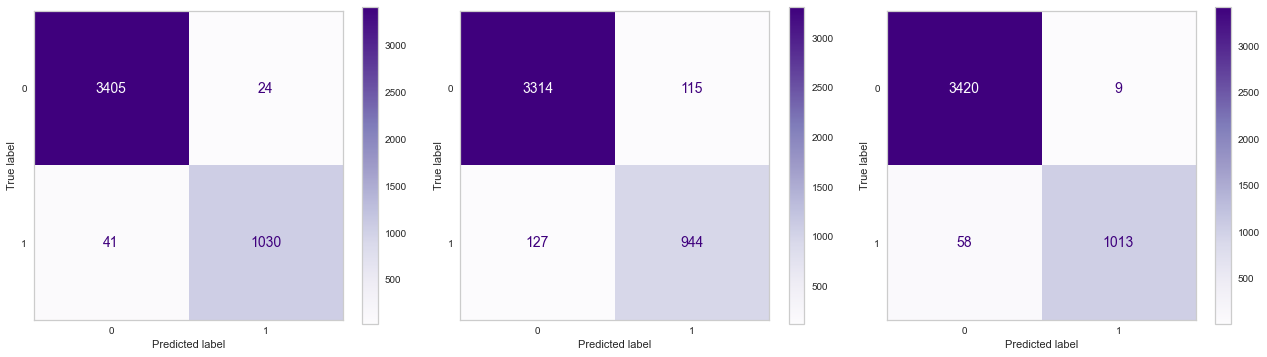

In [532]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
plt.rcParams.update({'font.size': 14})

classifiers = [grad_final,knn_final, rf_final]
for cls, ax in zip(classifiers, axes.flatten()):
    if cls==grad_final:
        plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Purples, ax=ax)
    if cls==knn_final:   
        plot_confusion_matrix(cls, X_test_scaled, y_test, cmap=plt.cm.Purples, ax=ax)
    if cls==rf_final:   
        plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Purples, ax=ax)
    ax.grid(False)
    # ax.title.set_text(type(cls.columns))

plt.tight_layout()
plt.show()

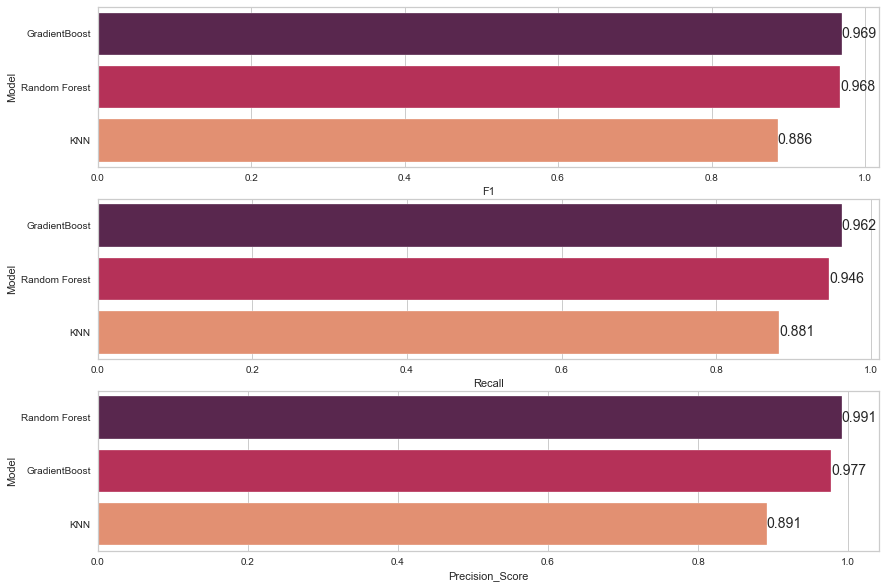

In [537]:
compare = pd.DataFrame({"Model": ["GradientBoost", "KNN", "Random Forest"],
                        "F1": [gb_f1,knn_final_f1, rf_grid_model_f1],
                        "Recall": [gb_recall, knn_final_recall, rf_grid_model_recall],
                        "Precision_Score": [ gb_precision, knn_final_precision, rf_grid_model_precision]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="rocket")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="rocket")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Precision_Score", ascending=False)
ax=sns.barplot(x="Precision_Score", y="Model", data=compare, palette="rocket")
labels(ax)
plt.show()

___



___